# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading data sets
appl_data=pd.read_csv('application_data.csv')


# DATA UNDERSTANDING

In [4]:
appl_data.shape

(307511, 122)

In [5]:
appl_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
appl_data.describe(include='all')

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count   3.075110e+05  307499.000000  ...     307511.000000    307511.000000   
unique           NaN            NaN  ...               NaN              NaN   
top              NaN            NaN  ...               NaN              NaN   
freq             NaN            NaN  ...               NaN              NaN   
mean    5.990260e+05   27108.573909  ...          0.008130         0.000595   
std     4.024908e+05   14493.737315  ...          0.089798         0.024387   
min     4.500000e+04    1615.500000  ...          0.000000         0.000000   
25%     2.700000e+05   16524.000000  ...          0.000000         0.000000   
50%     5.135310e+05   24903.000000  ...          0.000000         0.000000   
75%     8.086500e+05   34596.000000  ...          0.000000         0.000000   
max     4.050000e+06  258025.500000  ...          1.000000         1.000000   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000    307511.000000              265992.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean           0.000507         0.000335                   0.006402   
std            0.022518         0.018299                   0.083849   
min            0.000000         0.000000                   0.000000   
25%            0.000000         0.000000                   0.000000   
50%            0.000000         0.000000                   0.000000   
75%            0.000000         0.000000                   0.000000   
max            1.000000         1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000           

# Data Cleaning

**CHECKING FOR MISSING VALUES IN COLUMNS**

In [7]:
(appl_data.isnull().mean()*100).sort_values(ascending=False)  

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [8]:
to_drop=(appl_data.isnull().mean()*100)[appl_data.isnull().mean()>0.48]

* to_drop contains columns with more than 48% missing values.
 Imputing these columns might give a false information about the entire data set. So dropping these columns.

In [9]:
to_drop.index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [10]:
appl_data.drop(to_drop.index,axis=1,inplace=True) # dropping columns with more than 48% missing values

**The following columns doesnt appear to be driving factors for a person to be a defaulter. SO DROPPING THESE COLUMNS**
*******************************************************************************************
* 'REGION_POPULATION_RELATIVE' :Normalized population of region where client lives (higher number means the client lives in more populated region)\
* FLAG_PHONE : Did client provide home phone (1=YES, 0=NO)
* REGION_RATING_CLIENT :Our rating of the region where client lives (1,2,3)
* WEEKDAY_APPR_PROCESS_START : On which day of the week did the client apply for the loan
* HOUR_APPR_PROCESS_START :Approximately at what hour did the client apply for the loan
* REG_REGION_NOT_LIVE_REGION :Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
* REG_REGION_NOT_WORK_REGION:Flag if client's permanent address does not match work address (1=different, 0=same, at region level)
* LIVE_REGION_NOT_WORK_REGION:Flag if client's contact address does not match work address (1=different, 0=same, at region level)
* EMERGENCYSTATE_MODE (Dont understand what this column represent)
* EXT_SOURCE_2 (Dont understand what this column represent)
* EXT_SOURCE_3(Dont understand what this column represent)
* DAYS_LAST_PHONE_CHANGE


In [11]:
col=['REGION_POPULATION_RELATIVE','FLAG_PHONE','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION','EMERGENCYSTATE_MODE','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE']   
appl_data.drop(col,axis=1,inplace=True)

In [12]:
# shape of dataframe after dropping the columns
appl_data.shape

(307511, 62)

In [13]:
 # checking columns those have null values
appl_data.isnull().mean()[appl_data.isnull().mean()>0]*100 

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

**HANDLING MISSING VALUES IN OCCUPATION_TYPE COLUMN**\
OCCUPATION_TYPE column has more than 31% values missing 

In [14]:
appl_data['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

In [15]:
appl_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

1) occupation of a person has direct impact on the TARGET column, so dropping it is not a good idea.\
2) filling the missing values with the most occured value('Laborers') in the OCCUPATION_TYPE column will imply all the missing values are 'Laborers'  which may not be true.\
3) Hence,filling the missing values with 'unavailable'.

In [16]:
# Replacing the missing values with 'unavailable'
appl_data.loc[appl_data['OCCUPATION_TYPE'].isna(),'OCCUPATION_TYPE']='unavailable'

In [17]:
 # checking columns those have null value percentage greater 0
appl_data.isnull().mean()[appl_data.isnull().mean()>0]*100 

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
CNT_FAM_MEMBERS                0.000650
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [18]:
# The column in the following list have more than 13% missing values
list1=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'
      ]

**UNDERSTANG THE COLUMNS IN THE list1 LIST**
* AMT_REQ_CREDIT_BUREAU_HOUR : Number of enquiries to Credit Bureau about the client one hour before application
* AMT_REQ_CREDIT_BUREAU_DAY : Number of enquiries to Credit Bureau about the client one day before application
* AMT_REQ_CREDIT_BUREAU_WEEK:Number of enquiries to Credit Bureau about the client one week before application
* AMT_REQ_CREDIT_BUREAU_MON : Number of enquiries to Credit Bureau about the client one month before application
* AMT_REQ_CREDIT_BUREAU_QRT : Number of enquiries to Credit Bureau about the client 3 month before application
* AMT_REQ_CREDIT_BUREAU_YEAR :  Number of enquiries to Credit Bureau about the client one year before application

In [19]:
#trying to get statistical information about the columns in list1
appl_data[list1].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

**OBSERVATION**
* AMT_REQ_CREDIT_BUREAU_HOUR\
    -  mean = 0.006402
    -  median= 0
    -  Since the column has more than 13% missing values, imputing with mean or median will give a false idea\
       about the data. 
* AMT_REQ_CREDIT_BUREAU_DAY\
    -  mean = 0.007000
    -  median= 0
    -  Since the column has more than 13% missing values, imputing with mean or median will give a false idea\
       about the data.
* AMT_REQ_CREDIT_BUREAU_WEEK\
    -  mean = 0.034362
    -  median= 0
    -  Since the column has more than 13% missing values, imputing with mean or median will give a false idea\
       about the data.
* AMT_REQ_CREDIT_BUREAU_MON\
    -  mean = 0.267395
    -  median= 0
    -  Since the column has more than 13% missing values, imputing with mean or median will give a false idea\
       about the data.       
* AMT_REQ_CREDIT_BUREAU_QRT\
    -  mean = 0.265474
    -  median= 0
    -  Since the column has more than 13% missing values, imputing with mean or median will give a false idea\
       about the data.       
* AMT_REQ_CREDIT_BUREAU_YEAR\
    -  mean = 1.899974
    -  median= 0
    -  Since the column has more than 13% missing values, imputing with mean or median will give a false idea\
       about the data.       

**missing values in AMT_ANNUITY column**


In [20]:
appl_data['AMT_ANNUITY'].head()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

In [21]:
appl_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

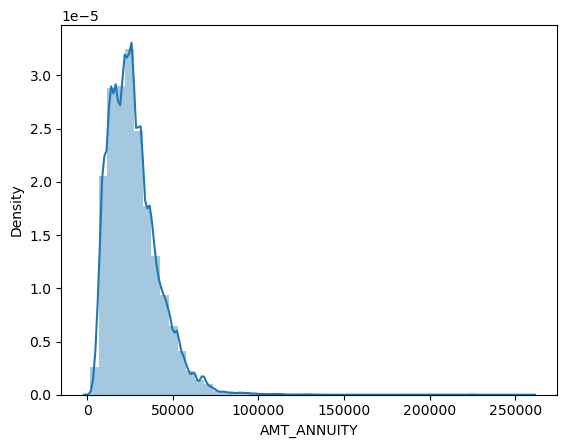

In [22]:
sns.distplot(appl_data['AMT_ANNUITY'])

Clearly from the above distplot the distribution of AMT_ANNUITY is skewed. So mean may not be the correct estimation for the missing values. Its better to impute the missing values with the median.

In [23]:
#filling the missing values of AMT_ANNUITY column with median
appl_data['AMT_ANNUITY'].fillna(appl_data['AMT_ANNUITY'].median(),inplace=True)


**missing values in AMT_GOODS_PRICE column**

In [24]:
appl_data['AMT_GOODS_PRICE'].head()

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [25]:
appl_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Density'>

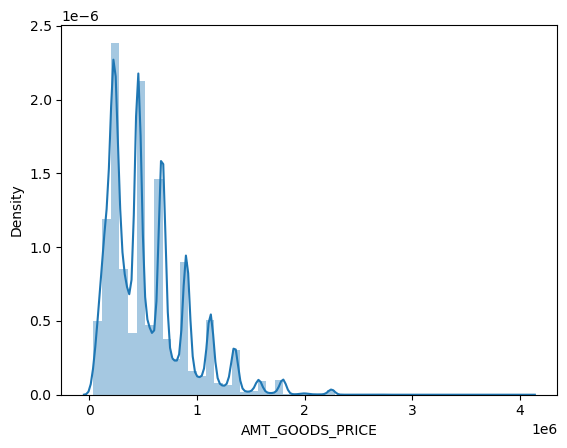

In [26]:
sns.distplot(appl_data['AMT_GOODS_PRICE'])

Clearly from the above distplot the distribution of AMT_GOODS_PRICE is skewed. So mean may not be the correct estimation for the missing values. Its better to impute the missing values with the median.

In [27]:
#filling the missing values of AMT_ANNUITY column with median
appl_data['AMT_GOODS_PRICE'].fillna(appl_data['AMT_GOODS_PRICE'].median(),inplace=True)

**missing values in NAME_TYPE_SUITE columns**

In [28]:
appl_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [29]:
# NAME_TYPE_SUITE is a categoriacl column, we can repalce the missing values with the most occured value which is the mode of the column.
appl_data['NAME_TYPE_SUITE'].fillna(appl_data['NAME_TYPE_SUITE'].mode()[0],inplace=True)


**missing values in CNT_FAM_MEMBERS columns**

In [30]:
appl_data['CNT_FAM_MEMBERS'].head()

0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [31]:
appl_data['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

CNT_FAM_MEMBERS is a numerical column .We see that most of the people are in a family with 2 members.\
we can replace the missing values with the mode of the column.

In [32]:
appl_data['CNT_FAM_MEMBERS'].fillna(appl_data['CNT_FAM_MEMBERS'].mode()[0],inplace=True)
# Filled the missing value in CNT_FAM_MEMBERS with mode of the column

**handling null values in the following columns-**
    - OBS_30_CNT_SOCIAL_CIRCLE ,DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE\
* column description:
    * OBS_30_CNT_SOCIAL_CIRCLE : How many observation of client's social surroundings with observable 30 DPD (days past due) default
    * DEF_30_CNT_SOCIAL_CIRCLE : How many observation of client's social surroundings defaulted on 30 DPD (days past due) 
    * OBS_60_CNT_SOCIAL_CIRCLE : How many observation of client's social surroundings with observable 60 DPD (days past due) default
    * DEF_60_CNT_SOCIAL_CIRCLE : How many observation of client's social surroundings defaulted on 60 (days past due) DPD

**checking rows which as null values in all the 4 above columns**

In [33]:
appl_data[(appl_data['OBS_30_CNT_SOCIAL_CIRCLE'].isnull())&(appl_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull())&
          (appl_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull())&(appl_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull())
         ]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
68          100080       0    Revolving loans           F            N   
394         100457       0    Revolving loans           F            Y   
397         100460       0    Revolving loans           F            N   
457         100527       0    Revolving loans           F            N   
1042        101209       0    Revolving loans           M            Y   
...            ...     ...                ...         ...          ...   
305526      453980       0    Revolving loans           F            Y   
305623      454093       0    Revolving loans           M            Y   
305641      454116       0    Revolving loans           F            N   
305642      454117       0    Revolving loans           F            Y   
307402      456135       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
68                   N             1          157500.0    450000.0   
394                  Y             0          211500.0    270000.0   
397                  N             0          315000.0    540000.0   
457                  N             0          112500.0    270000.0   
1042                 N             0          180000.0    540000.0   
...                ...           ...               ...         ...   
305526               Y             2           72000.0    225000.0   
305623               Y             2           90000.0    202500.0   
305641               N             0          270000.0    765000.0   
305642               Y             1          202500.0    765000.0   
307402               Y             0          157500.0    382500.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
68          22500.0  ...                 0                0                0   
394         13500.0  ...                 0                0                0   
397         27000.0  ...                 0                0                0   
457         13500.0  ...                 0                0                0   
1042        27000.0  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
305526      11250.0  ...                 0                0                0   
305623      10125.0  ...                 0                0                0   
305641      38250.0  ...                 0                0                0   
305642      38250.0  ...                 0                0                0   
307402      19125.0  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
68                    0                        0.0                       0.0   
394                   0                        NaN                       NaN   
397                   0                        0.0                       0.0   
457                   0                        0.0                       0.0   
1042                  0                        0.0                       0.0   
...                 ...                        ...                       ...   
305526                0                        NaN                       NaN   
305623                0                        0.0                       0.0   
305641                0                        0.0                       0.0   
305642                0                        NaN                       NaN   
307402                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
68                             0.0                        0.0   
394                            NaN                        NaN   
397                            0.0                        0.0   
457                            0.0                        0.0   
1042                           

In [34]:
appl_data=appl_data[~((appl_data['OBS_30_CNT_SOCIAL_CIRCLE'].isnull())&
                      (appl_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull())&
                      (appl_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull())&
                      (appl_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull()))
                   ]
#Dropping the rows which has missing values in all the four columns OBS_30_CNT_SOCIAL_CIRCLE ,DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE , DEF_60_CNT_SOCIAL_CIRCLE

In [35]:
# Shape of data after handling missing values
appl_data.shape

(306490, 62)

**FLAG DOCUMENT COLUMNS**\
FLAG_DOCUMENTS 2 TO 21 : THESE COLUMNS SHOW IF THE PARTICULAR DOCUMENT HAS BEEN SUBMITTE OR NOT.
THESE 20 COLUMNS SEEM IRRELEVENT IN DECIDING WHETHER THE CLIENT WILL BE A DEFAULTER OR NOT\
SO DROPPING THESE 20 COLUMNS

In [36]:
document_cols=appl_data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns
appl_data.drop(document_cols,axis=1,inplace=True)

In [37]:
appl_data.shape # CHECKING THE SHAPE OF THE DATA 

(306490, 42)

# FIXING INCORRECT ROWS AND COLUMNS

The entries in the columns DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH' are negative.
Number of days cannot be negative so converting them into possitive and then converting days to years

In [38]:
# entries in lst are negative. converting them to possitive. and then converting days into years.
lst=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for item in lst:
    appl_data[item]=appl_data[item].apply(lambda x : abs(x))
    appl_data[item]=appl_data[item].apply(lambda x :x/365)
    appl_data[item]=appl_data[item].apply(lambda x: round(x,2))


In [39]:
# rounding off all coulms with days and changing the names of the columns 
appl_data['AGE']=round(appl_data['DAYS_BIRTH'],0)
appl_data['YEARS_EMPLOYED']=round(appl_data['DAYS_EMPLOYED'],0)
appl_data['YEARS_REGISTRATION']=round(appl_data['DAYS_REGISTRATION'],0)
appl_data['YEARS_ID_PUBLISH']=round(appl_data['DAYS_ID_PUBLISH'],0)



In [40]:
#since age in days have been converted to years (age), we can drop the 'DAYS_BIRTH','DAYS_EMPLOYED' ,DAYS_REGISTRATION,'DAYS_ID_PUBLISH column
appl_data.drop(['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'],axis=1,inplace=True)

In [41]:
appl_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0  ...                         0.0                       0.0   
1  ...                         0.0                       0.0   
2  ...                         0.0                       0.0   
3  ...                         NaN                       NaN   
4  ...                         0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR   AGE  YEARS_EMPLOYED  \
0                       0.0                        1.0  26.0             2.0   
1                       0.0                        0.0  46.0             3.0   
2                       0.0                        0.0  52.0             1.0   
3                       NaN                        NaN  52.0             8.0   
4                       0.0                        0.0  55.0             8.0   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  
0                10.0               6.0  
1                 3.0               1.0  
2                12.0               7.0  
3                27.0               7.0  
4                12.0               9.0  

[5 rows x 42 columns]

# Detecting Outliers

In [42]:
numerical_columns=appl_data.dtypes[appl_data.dtypes!='object'].index
numerical_columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH'],
      dtype='object')

count    3.064900e+05
mean     1.686301e+05
std      2.372656e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.453500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

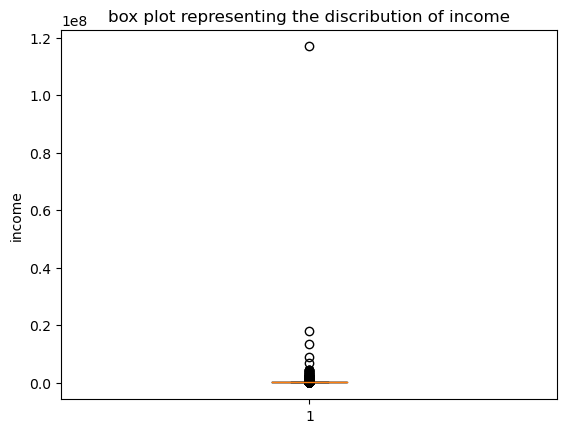

In [43]:
# outliers in AMT_INCOME_TOTAL column
plt.boxplot(appl_data['AMT_INCOME_TOTAL'])
plt.title('box plot representing the discribution of income')
plt.ylabel('income')
appl_data['AMT_INCOME_TOTAL'].describe()

* The above box plot clearly shows that there are outliers present in the AMT_INCOME_TOTAL column

In [44]:
IQR=np.percentile(appl_data['AMT_INCOME_TOTAL'],75)-np.percentile(appl_data['AMT_INCOME_TOTAL'],25)  # calculating the inter quartile range
upper_lim=np.percentile(appl_data['AMT_INCOME_TOTAL'],75)+1.5*IQR
print(upper_lim)
# any value above the upper_lim is considered as outliers.

337500.0


count    3.064900e+05
mean     5.995069e+05
std      4.025481e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.147775e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

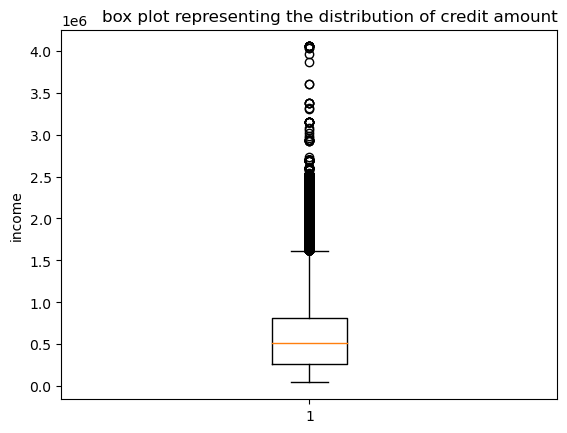

In [45]:
#outliers in AMT_CREDIT column
plt.boxplot(appl_data['AMT_CREDIT'])
plt.title('box plot representing the distribution of credit amount',loc='right')
plt.ylabel('income')
appl_data['AMT_CREDIT'].describe()

* In the above boxplot, we see a lot of values above the upper whisker, which represents the outliers in the data 

In [46]:

IQR=np.percentile(appl_data['AMT_CREDIT'],75)-np.percentile(appl_data['AMT_CREDIT'],25)  # calculating the inter quartile range
upper_lim=np.percentile(appl_data['AMT_CREDIT'],75)+1.5*IQR
print(upper_lim)
# any value above the upper_lim is considered as outliers.

1616625.0


count    306490.000000
mean      27123.018730
std       14478.759185
min        1615.500000
25%       16564.500000
50%       24930.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

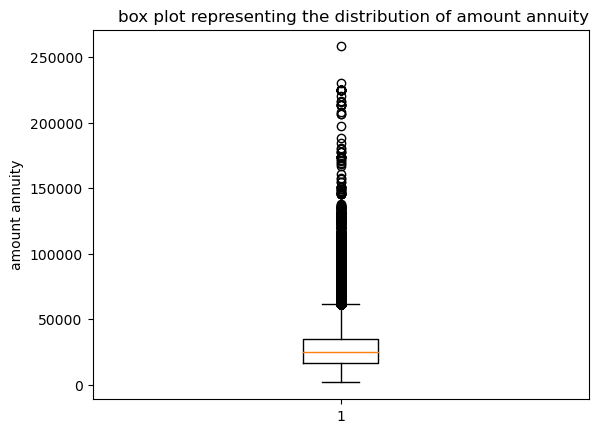

In [47]:
#outliers in AMT_ANNUITY column
plt.boxplot(appl_data['AMT_ANNUITY'])
plt.title('box plot representing the distribution of amount annuity',loc='right')
plt.ylabel('amount annuity')
appl_data['AMT_ANNUITY'].describe()

* In the above boxplot, we see a lot of values above the upper whisker, which represents the outliers in the data 

In [48]:

IQR=np.percentile(appl_data['AMT_ANNUITY'],75)-np.percentile(appl_data['AMT_ANNUITY'],25)  # calculating the inter quartile range
upper_lim=np.percentile(appl_data['AMT_ANNUITY'],75)+1.5*IQR
print(upper_lim)
# any value above the upper_lim is considered as outliers.

61643.25


count    3.064900e+05
mean     5.385949e+05
std      3.692985e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

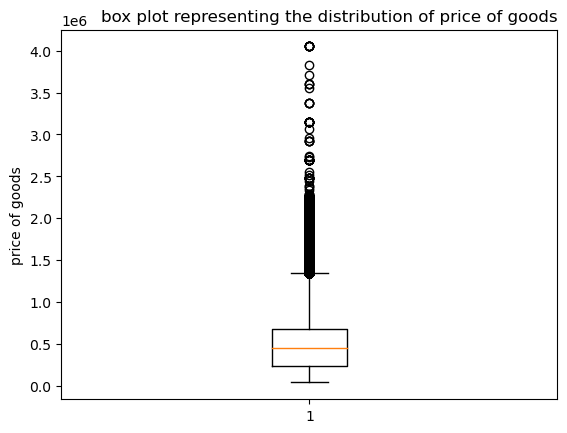

In [49]:
#outliers in AMT_GOODS_PRICE column
plt.boxplot(appl_data['AMT_GOODS_PRICE'])
plt.title('box plot representing the distribution of price of goods',loc='right')
plt.ylabel('price of goods')
appl_data['AMT_GOODS_PRICE'].describe()

* In the above boxplot, we see a lot of values above the upper whisker, which represents the outliers in the data 


In [50]:

IQR=np.percentile(appl_data['AMT_GOODS_PRICE'],75)-np.percentile(appl_data['AMT_GOODS_PRICE'],25)  # calculating the inter quartile range
upper_lim=np.percentile(appl_data['AMT_GOODS_PRICE'],75)+1.5*IQR
print(upper_lim)
# any value above the upper_lim is considered as outliers.

1341000.0


Text(0, 0.5, 'age (in years)')

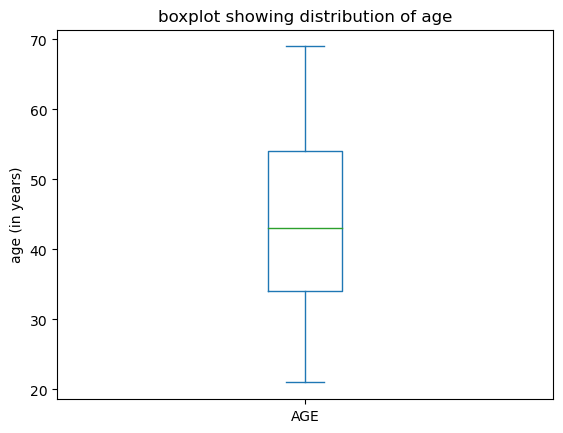

In [51]:
# checking for outliers in the age column
appl_data['AGE'].plot.box()
plt.title('boxplot showing distribution of age')
plt.ylabel('age (in years)')


* The boxplot shows there are no outliers in the age column

<AxesSubplot:>

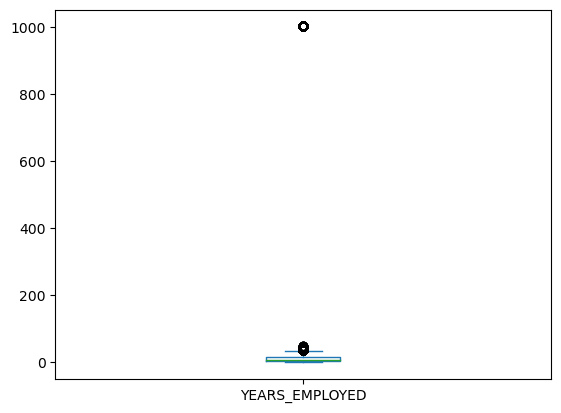

In [52]:
appl_data['YEARS_EMPLOYED'].plot.box()

* From the boxplot above we see there are entries of more than 1000 years of employment. which is clearly impossible

Text(0, 0.5, 'number of children')

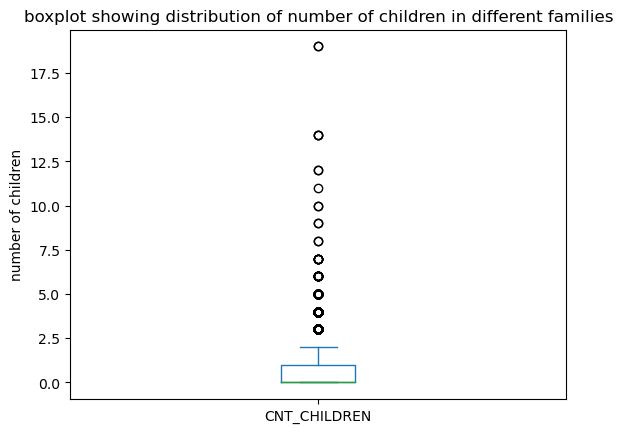

In [53]:
# checking for outliers in the CNT_CHILDREN column
appl_data['CNT_CHILDREN'].plot.box()
plt.title('boxplot showing distribution of number of children in different families')
plt.ylabel('number of children')

Text(0, 0.5, 'number of members')

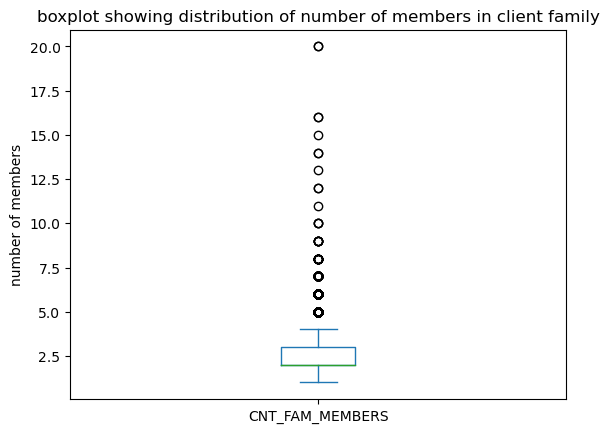

In [54]:
# checking for outliers in the CNT_FAM_MEMBERS column
appl_data['CNT_FAM_MEMBERS'].plot.box()
plt.title('boxplot showing distribution of number of members in client family')
plt.ylabel('number of members')

# UNIVARIATE ANALYSIS

# Univariate analysis on categorical columns

In [55]:
categorical_columns=appl_data.dtypes[appl_data.dtypes=='object'].index
categorical_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE'],
      dtype='object')

**NAME_CONTRACT_TYPE**

Text(0, 0.5, 'number of people')

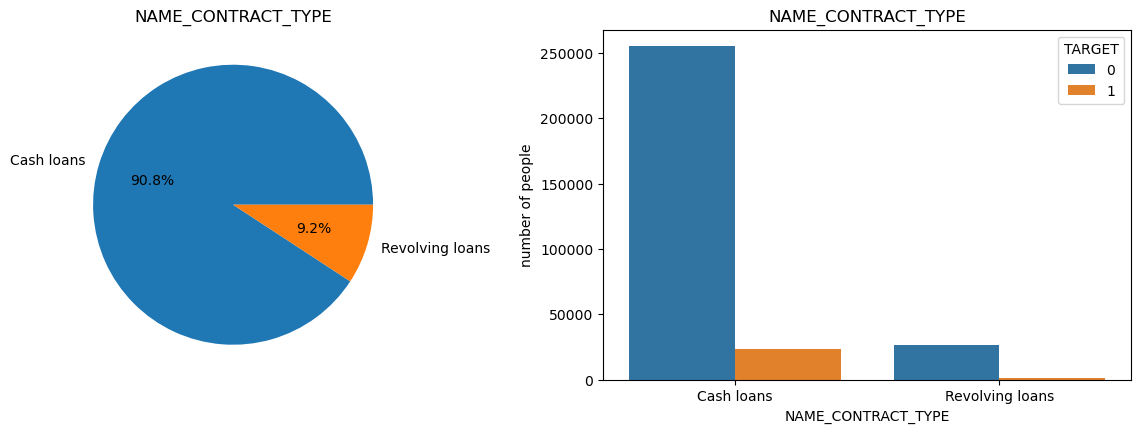

In [56]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.pie(appl_data['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100,autopct='%.1f%%',labels=appl_data['NAME_CONTRACT_TYPE'].value_counts().index)
plt.title('NAME_CONTRACT_TYPE');

plt.subplot(2,2,2)
sns.countplot(appl_data['NAME_CONTRACT_TYPE'], hue=appl_data['TARGET'])
plt.title('NAME_CONTRACT_TYPE')
plt.ylabel('number of people')

 **OBSERVATIONS : NAME_CONTRACT_TYPE**
* Used pie-chart to analyze the percentage of cash loans and revolving loans\
    There are more of cash loans than revolving loans
* Used countplot to see number of defaulters opted for cash loans and revolving loans
     

**CODE_GENDER column**

Text(0, 0.5, 'number of people')

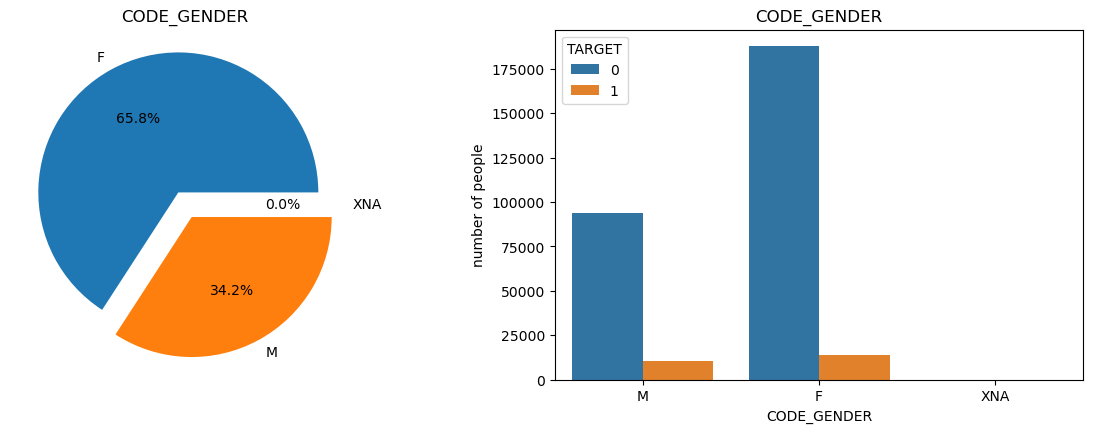

In [57]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.pie(appl_data['CODE_GENDER'].value_counts(normalize=True)*100,autopct='%.1f%%',labels=appl_data['CODE_GENDER'].value_counts().index,explode=[0.1,0.1,0.1])    
plt.title('CODE_GENDER');

plt.subplot(2,2,2)
sns.countplot(appl_data['CODE_GENDER'], hue=appl_data['TARGET'])
plt.title('CODE_GENDER')
plt.ylabel('number of people')

**OBSERVATIONS**
* We see there are there 3 entries F()Female, M(Male) and XNA. 
    - (Making an assumption that XNA belong to other gender who dont classify themselves as male or female)
* Used pie chart to see percentages of different gender types applying for loan.
     * The percentage of female applying for loan is almost twice as much as that of male.
* Countplot has been used to see the count of male , female and XNA in defaulters.
     * There is not much difference in the number of male defaulter and female defaulters

**NAME_INCOME_TYPE column**

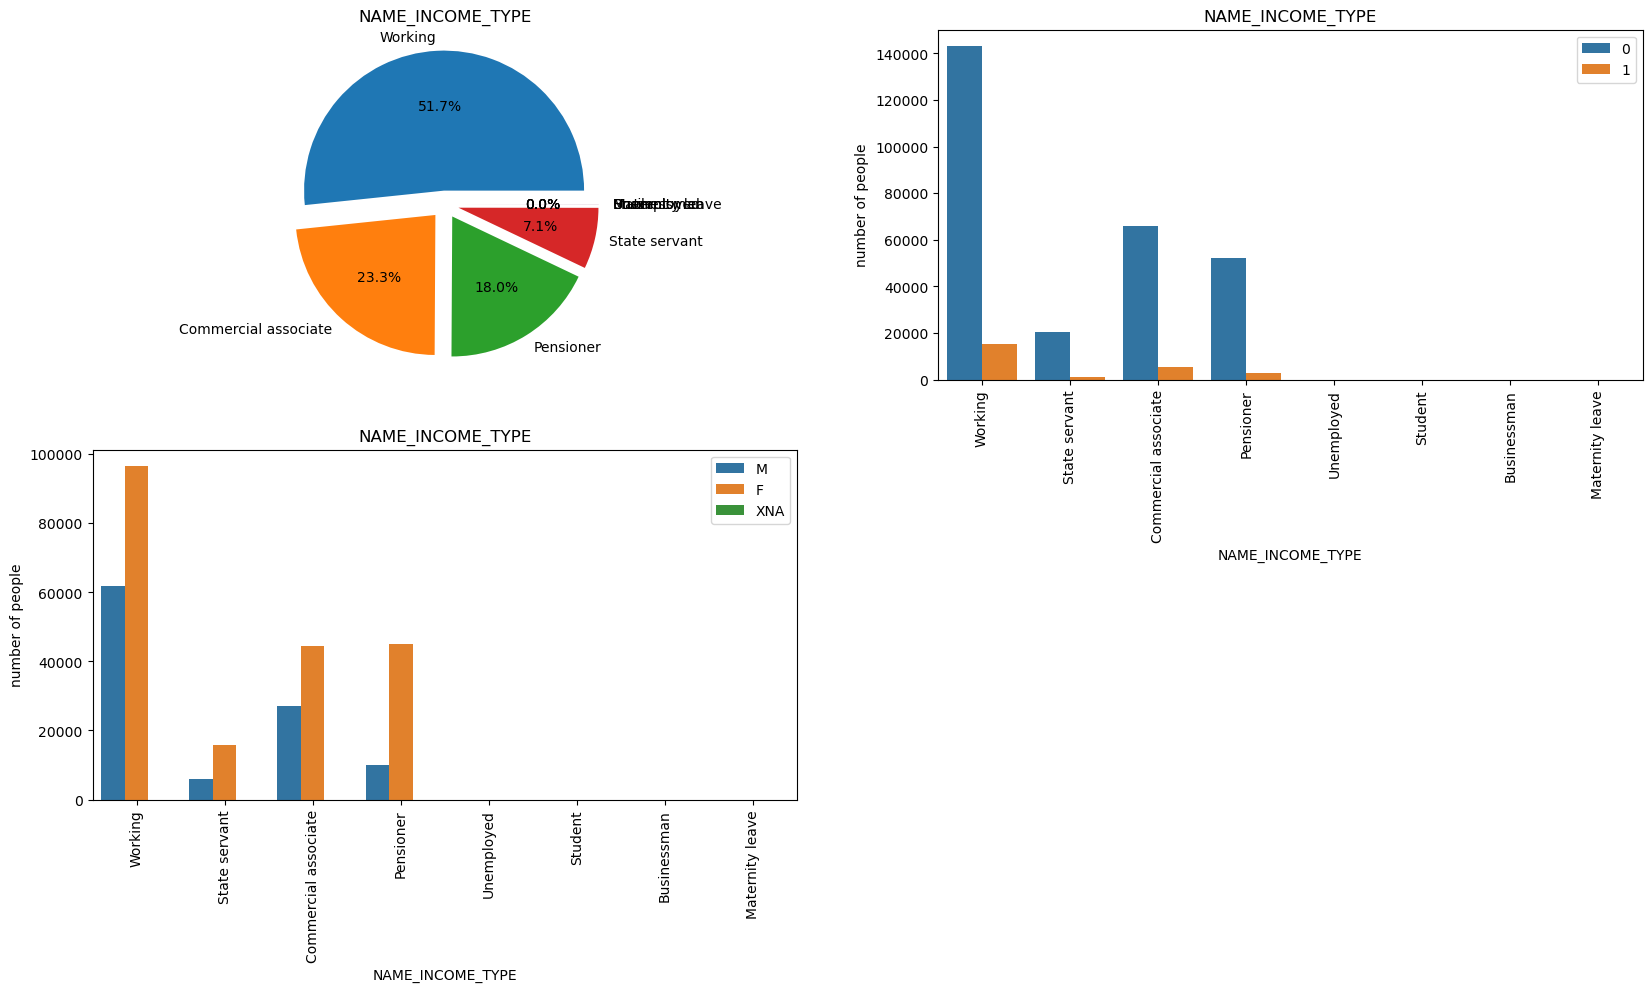

In [58]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.pie(appl_data['NAME_INCOME_TYPE'].value_counts(normalize=True)*100,autopct='%.1f%%',labels=appl_data['NAME_INCOME_TYPE'].value_counts().index,explode=[0.1]*8)    
plt.title('NAME_INCOME_TYPE');


plt.subplot(2,2,2)
sns.countplot(appl_data['NAME_INCOME_TYPE'], hue=appl_data['TARGET'])
plt.title('NAME_INCOME_TYPE')
plt.ylabel('number of people')
plt.xticks(rotation=90)
plt.legend(loc='upper right');

plt.subplot(2,2,3)
sns.countplot(appl_data['NAME_INCOME_TYPE'], hue=appl_data['CODE_GENDER'])
plt.title('NAME_INCOME_TYPE')
plt.ylabel('number of people')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
#1.plotted a pie chat to see the percentage of applicants in each category of the NAME_INCOME_TYPE column\
#2.the second picture is of a countplot representing the count defaulters and non-defaulters in each category\
#3.2.the third picture is of a countplot representing the count of female , male,XNA in each category


**OBSERVATIONS**
 * Majority of the clients have NAME_INCOME_TYPE as working.
 * Very few people inthe caregory of Student,Unemployed,Businessman,and Maternity Leave who have applied for loan



**NAME_FAMILY_STATUS column**

Text(0.0, 1.0, 'PERCENTAGE OF FAMILY-STATE OF DIFFERENT PEOPLE')

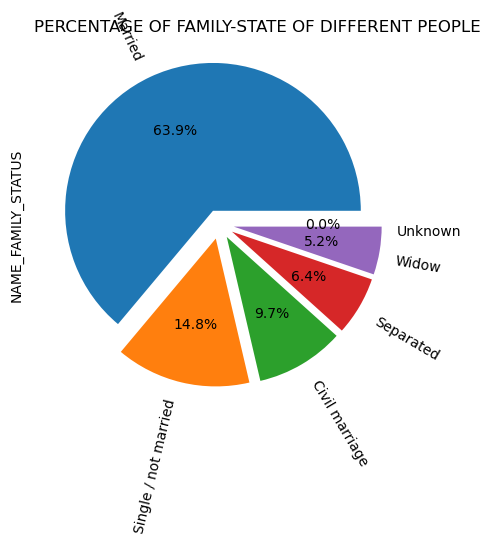

In [59]:
(appl_data['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100).plot(kind='pie',rotatelabels=True,autopct='%.1f%%',explode=[0.1]*6);
plt.title('PERCENTAGE OF FAMILY-STATE OF DIFFERENT PEOPLE',loc='left')
#Pie plot showing percentages of various categories in the NAME_FAMILY_STATUS column.

**OBSERVATIONS**
* Majority of the applicants are married. 
* there are very few applicants who are widow or whose family status is unknown

**ORGANIZATION_TYPE column**

Text(0.5, 1.0, 'PERCENTAGE OF PEOPLE IN DIFFERENT ORGANIZATION')

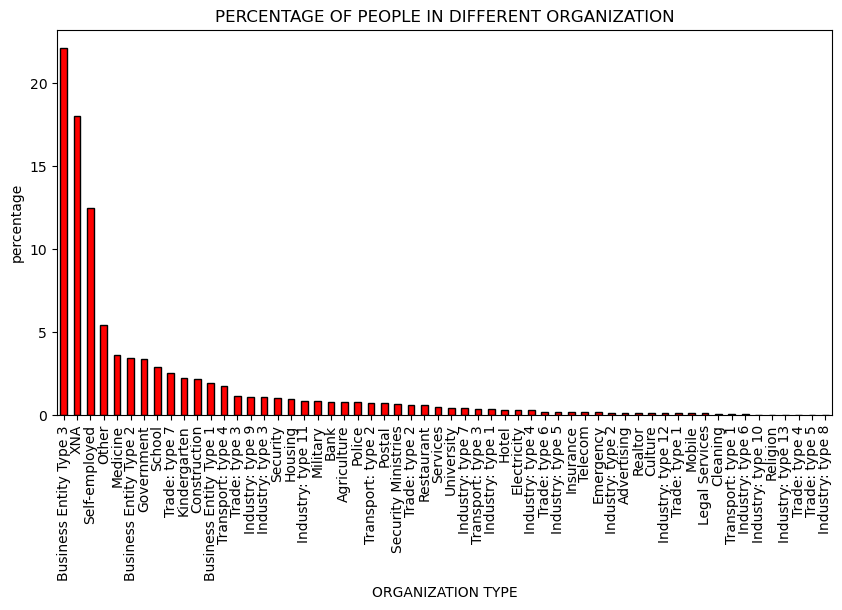

In [60]:
plt.figure(figsize=(10,5))
(appl_data['ORGANIZATION_TYPE'].value_counts(normalize=True)*100).plot(kind='bar',width=0.5,align='center',edgecolor='black',color='red');
plt.ylabel('percentage')
plt.xlabel('ORGANIZATION TYPE')
plt.title('PERCENTAGE OF PEOPLE IN DIFFERENT ORGANIZATION')
# Bar graph representing the percentage of people in each category of ORGANIZATION_TYPE column

**OBSERVATIONS**
* Majority of the applicants are in Business Entity Type 3\
* There are least number of people in Industry Type 8


**NAME_EDUCATION_TYPE column**

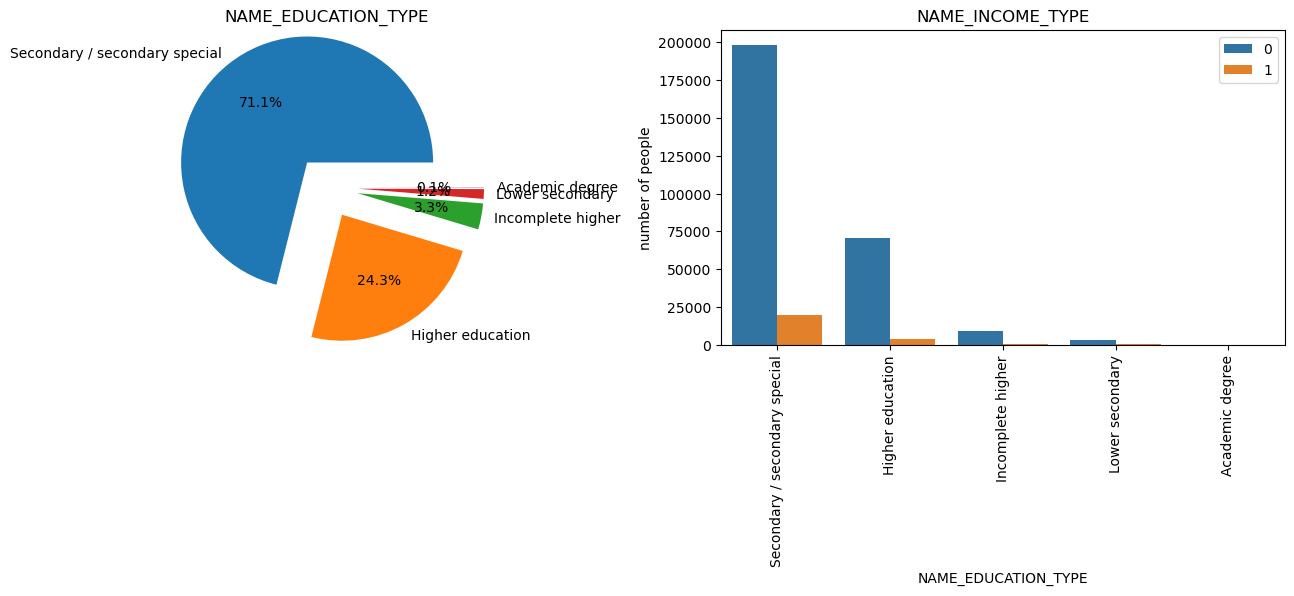

In [61]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
plt.pie(appl_data['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100,autopct='%.1f%%',labels=appl_data['NAME_EDUCATION_TYPE'].value_counts().index,explode=[0.25]*5)    
plt.title('NAME_EDUCATION_TYPE');


plt.subplot(2,2,2)
sns.countplot(appl_data['NAME_EDUCATION_TYPE'], hue=appl_data['TARGET'])
plt.title('NAME_INCOME_TYPE')
plt.ylabel('number of people')
plt.xticks(rotation=90)
plt.legend(loc='upper right');

**OBSERVATIONS**
1. first is a pie plot representing percentage of people in different categories of NAME_EDUCATION_TYPE column
2. second is a count plot representing number of defaulters and non defaulters in each category of the NAME_EDUCATION_TYPE column

* Majority of the applicants have a Secondary / Secondary special education\
* Very less percentage of applicants  have either an academic degree or lower secondary or incomplete higher education

**OCCUPATION_TYPE column**

Text(0.0, 1.0, 'OCCUPATION_TYPE OF PEOPLE APPLYING FOR LOAN')

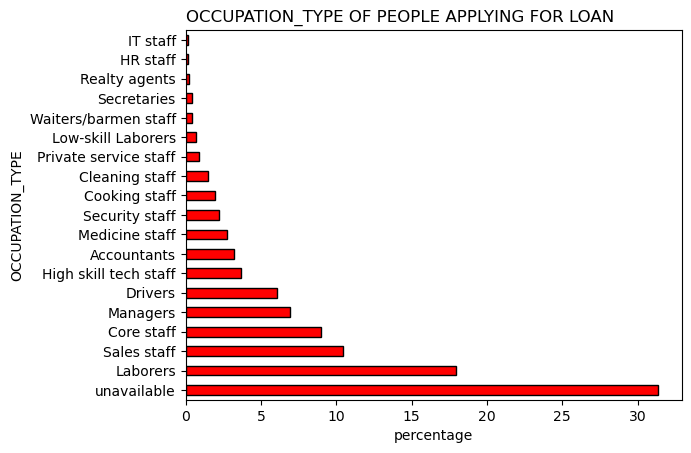

In [62]:
(appl_data['OCCUPATION_TYPE'].value_counts(normalize=True)*100).plot(kind='barh',color='red',edgecolor='black');
plt.ylabel('OCCUPATION_TYPE')
plt.xlabel('percentage')
plt.title('OCCUPATION_TYPE OF PEOPLE APPLYING FOR LOAN',loc='left')


1.  count plot representing percentage of people in each category of the OCCUPATION_TYPE column

**OBSERVATIONS**
* Majority of the application whose Occupation type are mentioned are Laborers
* The least of the applicants are from IT staff

# UNIVARIATE ANALYSIS ON NUMERICAL COLUMNS

In [63]:
numerical_cols=appl_data.dtypes[appl_data.dtypes!='object'].index
numerical_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH'],
      dtype='object')

Text(0.5, 1.0, 'AMT_INCOME_TOTAL')

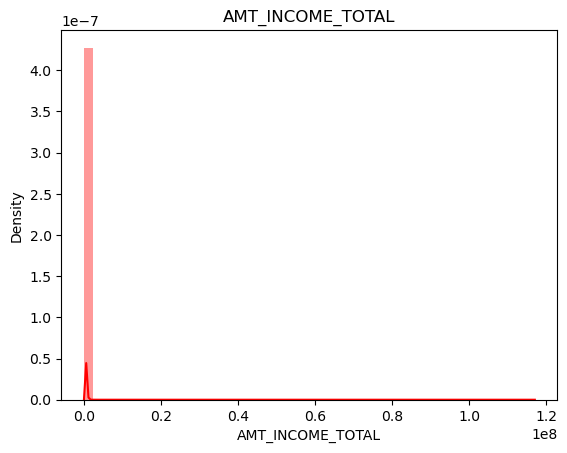

In [64]:
sns.distplot(appl_data['AMT_INCOME_TOTAL'],color='r')
plt.title('AMT_INCOME_TOTAL')
# Distribution plot of the income of the client

AMT_INCOME_TOTAL column contains outliers. 
plotting a distribution plot of the column without the outliers

In [65]:
# creating a series of the AMT_INCOME_TOTAL columns whose values are less than 99th percentile 
np.percentile(appl_data['AMT_INCOME_TOTAL'],99)
INCOME_no_outlier=appl_data[appl_data['AMT_INCOME_TOTAL']<np.percentile(appl_data['AMT_INCOME_TOTAL'],99)]['AMT_INCOME_TOTAL']


Text(0.5, 1.0, 'AMT_INCOME_TOTAL_no(without outliers)')

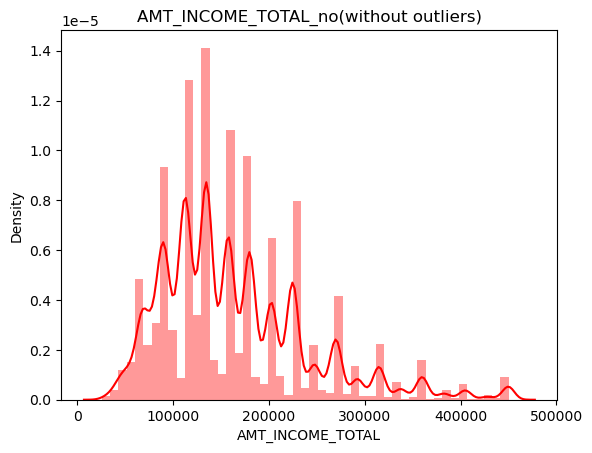

In [66]:
# plotting the column AMT_INCOME_TOTAL without outlier
sns.distplot(INCOME_no_outlier,color='r')
plt.title('AMT_INCOME_TOTAL_no(without outliers)')

**OBSERVATIONS**
* We see the plot is slightly skewed towards the left
* We see the density is the highest in the range 1lakh to 2lakhs 

Text(0.5, 1.0, 'AMT_CREDIT')

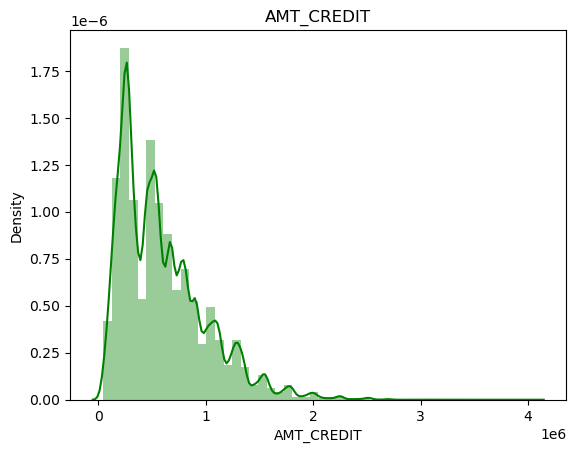

In [67]:
# plotting distribution of AMT_CREDIT column
sns.distplot(appl_data['AMT_CREDIT'],color='g')
plt.title('AMT_CREDIT') 


**OBSERVATIONS**
* From the above plot we see the distribution of the AMT_CREDIT  is skewed towards the left
* We observe the highest density to be somewhere around 3 lakhs

Text(0.5, 1.0, 'AMT_ANNUITY')

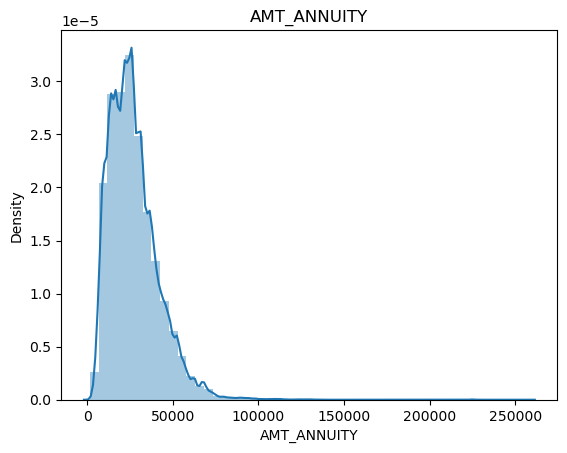

In [68]:
# plotting distribution of AMT_ANNUITY column


sns.distplot(appl_data['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')


**OBSERVATIONS**
* From the above plot we see the distribution of the AMT_ANNUITY  is skewed towards left.
* The highest observation is somewhere around 25000

Text(0.5, 1.0, 'AMT_GOODS_PRICE')

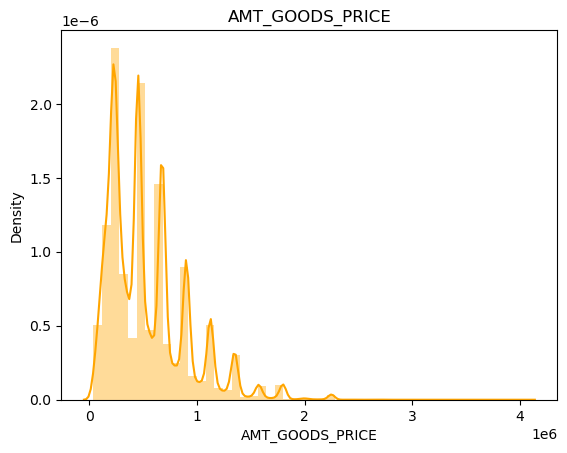

In [69]:
# plotting distribution of AMT_ANNUITY column
sns.distplot(appl_data['AMT_GOODS_PRICE'],color='orange')
plt.title('AMT_GOODS_PRICE')


**OBSERVATIONS**
* From the above plot we see the distribution of the AMT_ANNUITY  is skewed towards the left



Text(0.5, 1.0, 'AGE')

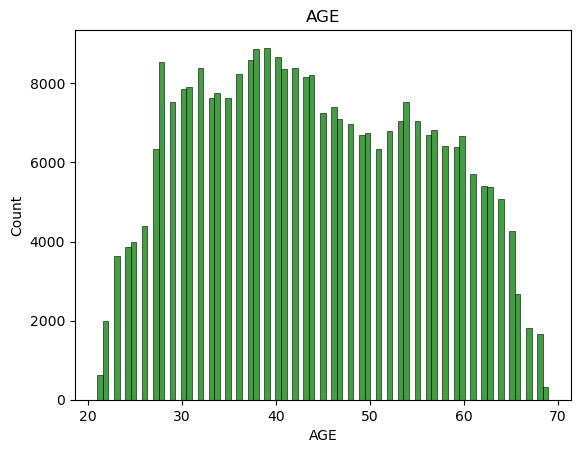

In [70]:
sns.histplot(appl_data['AGE'],color='green')
plt.title('AGE')
#Plotting distribution of age of the client

**OBSERVATIONS**
we see most of the apllicants are in 25 to 60 years range

# BIVARIATE AND MULTIVARIATE ANALYSIS

In [71]:
#checking correlation betewen diffent variables.
numerical_cols2=appl_data.dtypes[appl_data.dtypes!='object'].index
numerical_cols2

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH'],
      dtype='object')

The correlation between two variables ranges from -1 to 1. Negative value denotes negative correlation between variables and possitive value denotes possitive correlation. 
We are interested if there is a relation between the variables, doesnt matter possitive or negative. 
So taking absolute value of the correlation.

In [72]:
corr_df=abs(appl_data[numerical_cols2].corr())
corr_df

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000  0.002125      0.001150   
TARGET                         0.002125  1.000000      0.019213   
CNT_CHILDREN                   0.001150  0.019213      1.000000   
AMT_INCOME_TOTAL               0.001840  0.003735      0.013124   
AMT_CREDIT                     0.000354  0.030436      0.002373   
AMT_ANNUITY                    0.000448  0.012743      0.021808   
AMT_GOODS_PRICE                0.000271  0.039624      0.001593   
FLAG_MOBIL                     0.002809  0.000536      0.001043   
FLAG_EMP_PHONE                 0.001419  0.046138      0.240764   
FLAG_WORK_PHONE                0.000373  0.028300      0.055684   
FLAG_CONT_MOBILE               0.002876  0.000239      0.000890   
FLAG_EMAIL                     0.000264  0.001830      0.022717   
CNT_FAM_MEMBERS                0.002827  0.009272      0.879228   
REGION_RATING_CLIENT_W_CITY    0.001113  0.060690      0.024722   
REG_CITY_NOT_LIVE_CITY         0.001876  0.044382      0.020057   
REG_CITY_NOT_WORK_CITY         0.001619  0.050996      0.070601   
LIVE_CITY_NOT_WORK_CITY        0.000017  0.032531      0.069984   
OBS_30_CNT_SOCIAL_CIRCLE       0.001409  0.009131      0.015593   
DEF_30_CNT_SOCIAL_CIRCLE       0.000082  0.032248      0.001262   
OBS_60_CNT_SOCIAL_CIRCLE       0.001423  0.009022      0.015232   
DEF_60_CNT_SOCIAL_CIRCLE       0.001187  0.031276      0.001861   
AMT_REQ_CREDIT_BUREAU_HOUR     0.002547  0.000841      0.000307   
AMT_REQ_CREDIT_BUREAU_DAY      0.002247  0.002683      0.000400   
AMT_REQ_CREDIT_BUREAU_WEEK     0.002027  0.000716      0.002491   
AMT_REQ_CREDIT_BUREAU_MON      0.000130  0.012501      0.010942   
AMT_REQ_CREDIT_BUREAU_QRT      0.000980  0.002026      0.007829   
AMT_REQ_CREDIT_BUREAU_YEAR     0.004627  0.019845      0.041662   
AGE                            0.001412  0.078399      0.331207   
YEARS_EMPLOYED                 0.001450  0.047202      0.241636   
YEARS_REGISTRATION             0.000873  0.041844      0.183400   
YEARS_ID_PUBLISH               0.000338  0.051356      0.027811   

                             AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                           0.001840    0.000354     0.000448   
TARGET                               0.003735    0.030436     0.012743   
CNT_CHILDREN                         0.013124    0.002373     0.021808   
AMT_INCOME_TOTAL                     1.000000    0.156123     0.190632   
AMT_CREDIT                           0.156123    1.000000     0.769366   
AMT_ANNUITY                          0.190632    0.769366     1.000000   
AMT_GOODS_PRICE                      0.158689    0.986732     0.773992   
FLAG_MOBIL                           0.000325    0.001440     0.000151   
FLAG_EMP_PHONE                       0.064163    0.066010     0.104351   
FLAG_WORK_PHONE                      0.016869    0.021698     0.025368   
FLAG_CONT_MOBILE                     0.008146    0.023990     0.022840   
FLAG_EMAIL                           0.038453    0.016510     0.071801   
CNT_FAM_MEMBERS                      0.016463    0.063313     0.075877   
REGION_RATING_CLIENT_W_CITY          0.091026    0.111030     0.141714   
REG_CITY_NOT_LIVE_CITY               0.003761    0.026877     0.006083   
REG_CITY_NOT_WORK_CITY               0.006809    0.018796     0.001133   
LIVE_CITY_NOT_WORK_CITY              0.008622    0.000161     0.010295   
OBS_30_CNT_SOCIAL_CIRCLE             0.013099    0.000190     0.011984   
DEF_30_CNT_SOCIAL_CIRCLE             0.013244    0.021229     0.022831   
OBS_60_CNT_SOCIAL_CIRCLE             0.013015    0.000239     0.011728   
DEF_60_CNT_SOCIAL_CIRCLE             0.013135    0.023767     0.023999   
AMT_REQ_CREDIT_BUREAU_HOUR           0.000602    0.003816     0.003991   
AMT_REQ_CREDIT_BUREAU_DAY            0.002980    0.004185     0.002145   
AMT_REQ_CREDIT_BUREAU_WEEK           0.002494    0.001283     0.013963   
AMT_REQ_CREDIT_BUREAU_MON         

**PLOTTING HEATMAP FOR NUMERICAL COLUMNS**

<AxesSubplot:>

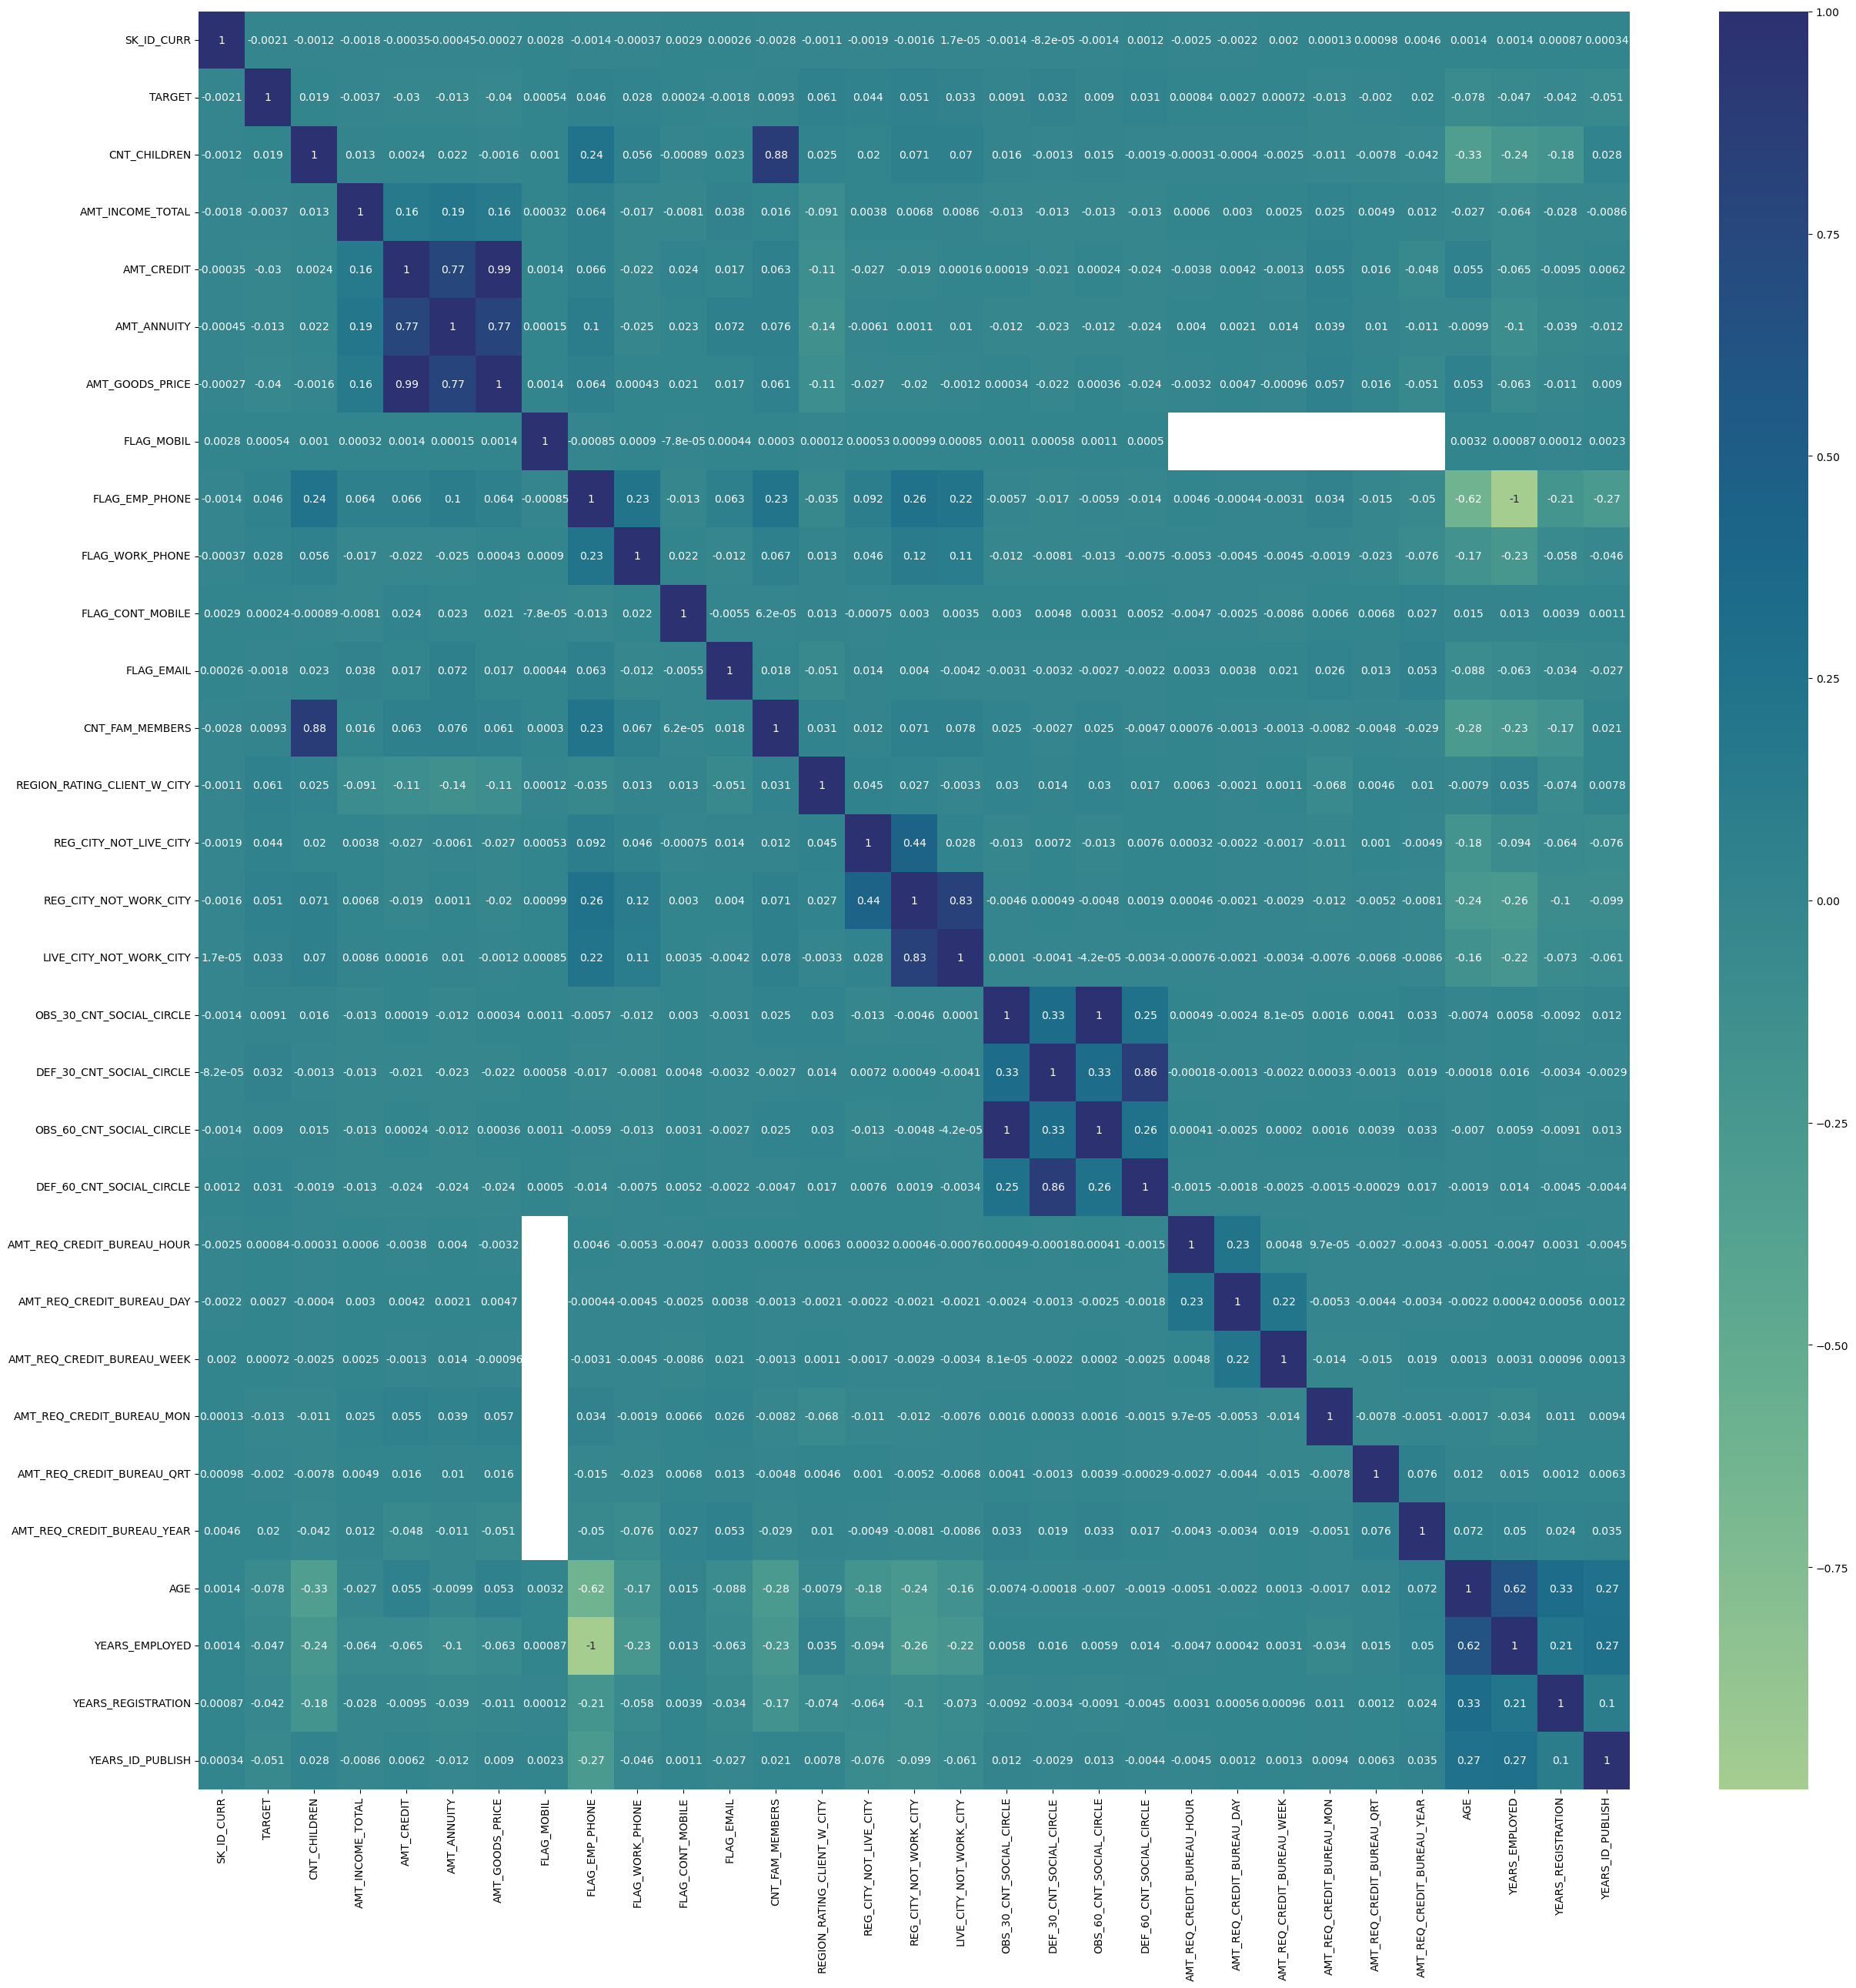

In [73]:
plt.figure(figsize=(30,30));
sns.heatmap(appl_data[numerical_cols2].corr(),cmap='crest', annot=True,square=False)
# Plotting the heatmap showing relation between numerical columns

In [74]:
# correlation of one column with itself is always 1. Removing all such pairs.
corr=corr_df.unstack()[corr_df.unstack()!=1]
corr.sort_values(ascending=False).head(22)

YEARS_EMPLOYED            FLAG_EMP_PHONE              0.999753
FLAG_EMP_PHONE            YEARS_EMPLOYED              0.999753
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998490
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998490
AMT_CREDIT                AMT_GOODS_PRICE             0.986732
AMT_GOODS_PRICE           AMT_CREDIT                  0.986732
CNT_CHILDREN              CNT_FAM_MEMBERS             0.879228
CNT_FAM_MEMBERS           CNT_CHILDREN                0.879228
DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE    0.860517
DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.860517
REG_CITY_NOT_WORK_CITY    LIVE_CITY_NOT_WORK_CITY     0.825615
LIVE_CITY_NOT_WORK_CITY   REG_CITY_NOT_WORK_CITY      0.825615
AMT_ANNUITY               AMT_GOODS_PRICE             0.773992
AMT_GOODS_PRICE           AMT_ANNUITY                 0.773992
AMT_ANNUITY               AMT_CREDIT                  0.769366
AMT_CREDIT                AMT_ANNUITY                 0

# TOP 10 CORRELATIONS

In [75]:

#
'''TOP 10 CORRELATIONS
    AMT_ANNUITY               AMT_GOODS_PRICE             0.773992

    AMT_CREDIT                AMT_ANNUITY                 0.769366

     DAYS_EMPLOYED             AGE                         0.623992

    AMT_GOODS_PRICE           AMT_CREDIT                  0.986732
    CNT_CHILDREN              CNT_FAM_MEMBERS             0.879228

    DAYS_EMPLOYED             FLAG_EMP_PHONE              0.999753

    OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998490

    FLAG_EMP_PHONE            AGE                         0.619941

    DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE    0.860517

    LIVE_CITY_NOT_WORK_CITY   REG_CITY_NOT_WORK_CITY      0.825615'''




'TOP 10 CORRELATIONS\n    AMT_ANNUITY               AMT_GOODS_PRICE             0.773992\n\n    AMT_CREDIT                AMT_ANNUITY                 0.769366\n\n     DAYS_EMPLOYED             AGE                         0.623992\n\n    AMT_GOODS_PRICE           AMT_CREDIT                  0.986732\n    CNT_CHILDREN              CNT_FAM_MEMBERS             0.879228\n\n    DAYS_EMPLOYED             FLAG_EMP_PHONE              0.999753\n\n    OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998490\n\n    FLAG_EMP_PHONE            AGE                         0.619941\n\n    DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE    0.860517\n\n    LIVE_CITY_NOT_WORK_CITY   REG_CITY_NOT_WORK_CITY      0.825615'

**Plotting scatter plot to see the relation between the pairs of variables in the top 10 correlation list**

CNT_CHILDREN and CNT_FAM_MEMBERS

Text(0.5, 1.0, 'Relation between number of children and number of family members')

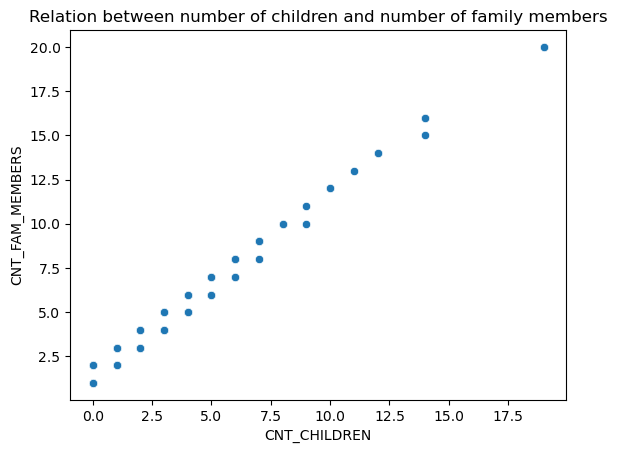

In [76]:
sns.scatterplot(appl_data['CNT_CHILDREN'],appl_data['CNT_FAM_MEMBERS'])
plt.title('Relation between number of children and number of family members')

**OBSERVATIONS**\
The above scatterplot shows, more the family members more will be the number of children

AMT_ANNUITY and AMT_GOODS_PRICE

Text(1.0, 1.0, 'Relation between AMT_ANNUITY and AMT_GOODS_PRICEs')

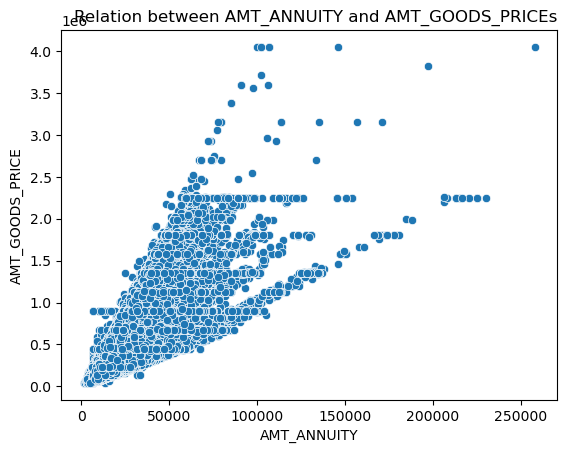

In [77]:
sns.scatterplot(appl_data['AMT_ANNUITY'],appl_data['AMT_GOODS_PRICE'])
plt.title('Relation between AMT_ANNUITY and AMT_GOODS_PRICEs', loc='right')

**OBSERVATIONS**\
From the above scatterplot we see that as the price of goods rises, the amount annuity also increases

AMT_CREDIT and AMT_ANNUITY

Text(0.5, 1.0, 'Relation between credit amount and amount annuity')

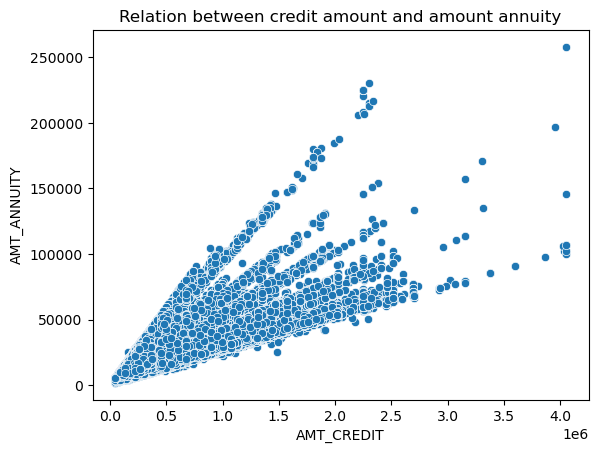

In [78]:
sns.scatterplot(appl_data['AMT_CREDIT'],appl_data['AMT_ANNUITY'])
plt.title('Relation between credit amount and amount annuity')

**OBSERVATIONS**\
From the above scatter plot we see as the credit amount increases , the amount annuity increases

AMT_GOODS_PRICE and AMT_CREDIT

Text(0.5, 1.0, 'Relation between prive of goods  and amount credit')

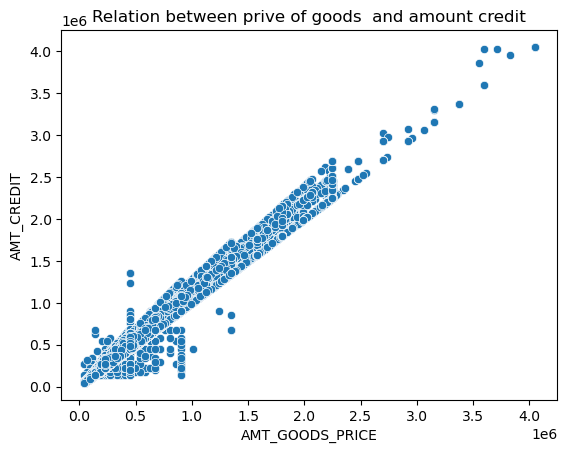

In [79]:
sns.scatterplot(appl_data['AMT_GOODS_PRICE'],appl_data['AMT_CREDIT'])
plt.title('Relation between prive of goods  and amount credit')

**OBSERVATIONS**\
From the scattter plot above, we see a stong relation between  price of goods and amount of credit .\
As the goods price increase , the amount credit also increases.


YEARS_EMPLOYED and AGE

Text(0.5, 1.0, 'Relation between age of the person and years employed')

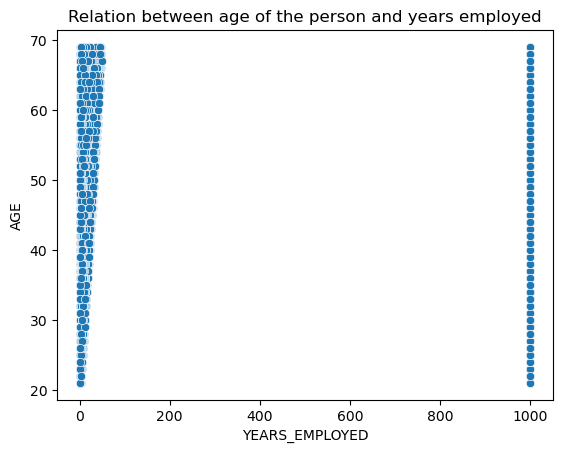

In [80]:
sns.scatterplot(appl_data['YEARS_EMPLOYED'],appl_data['AGE'])
plt.title('Relation between age of the person and years employed')

**OBSERVATIONS**\
In the above scatter plot we see years of employment being more than 1000 years, which isnt possible.
we see as the age increases, so does the number of years being employed
Removing the outliers in the employed column and then plotting the same scatterplot bellow.

Text(0.5, 1.0, 'Relation between age of the person and years employed')

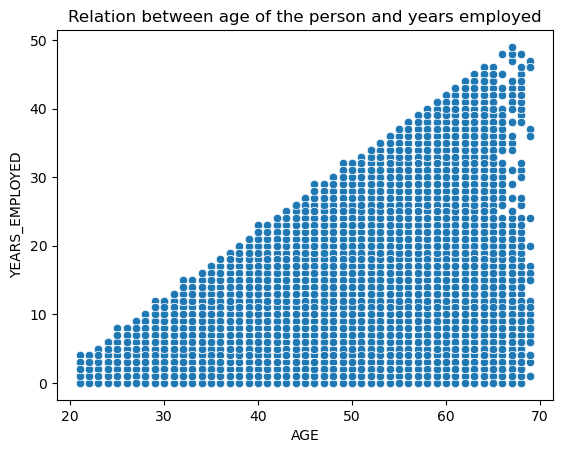

In [81]:
sns.scatterplot(appl_data['AGE'],appl_data[appl_data['YEARS_EMPLOYED']<1000]['YEARS_EMPLOYED'])  
# plotting the scatter plot without the outliers in the YEARS_EMPLOYED column
plt.title('Relation between age of the person and years employed')

**OBSERVATIONS**\
So we see the maximum years a person has been employed is around 50 years.\
Years of employment increases as the age increases,
there are aslo entries which shows that there are clients with age greater 50 with less than 10 years of employment.

YEARS_EMPLOYED and FLAG_EMP_PHONE

Text(0.5, 1.0, 'Relation between years of empolyment  and the client providing work phone number')

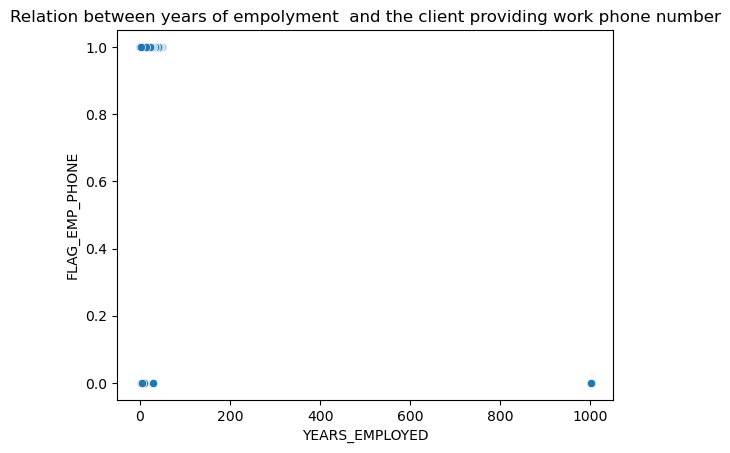

In [82]:
sns.scatterplot(appl_data['YEARS_EMPLOYED'],appl_data['FLAG_EMP_PHONE'])
plt.title('Relation between years of empolyment  and the client providing work phone number')
# 0 for client provided the work phone number 1 for not providing work phone number

OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE

<AxesSubplot:xlabel='OBS_60_CNT_SOCIAL_CIRCLE', ylabel='OBS_30_CNT_SOCIAL_CIRCLE'>

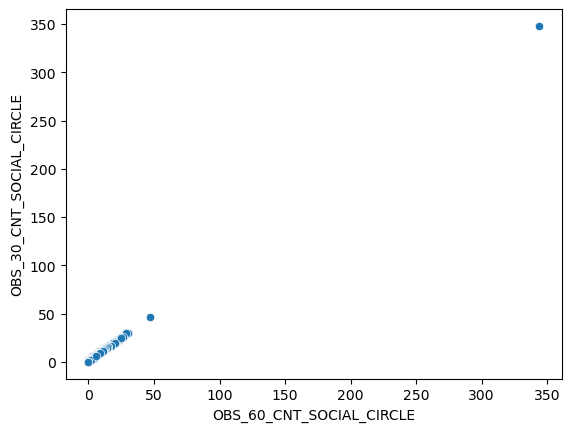

In [83]:

sns.scatterplot(appl_data['OBS_60_CNT_SOCIAL_CIRCLE'],appl_data['OBS_30_CNT_SOCIAL_CIRCLE'])


FLAG_EMP_PHONE and AGE

<AxesSubplot:xlabel='FLAG_EMP_PHONE', ylabel='AGE'>

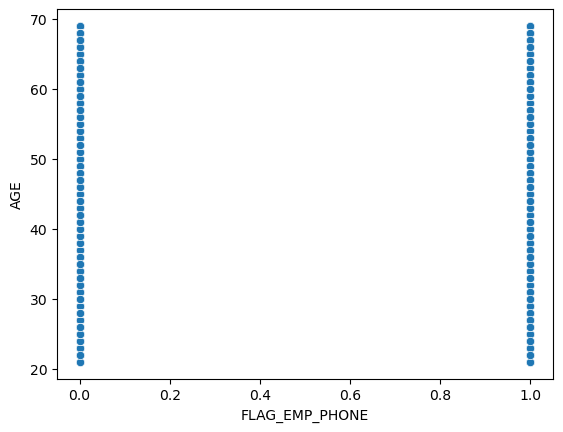

In [84]:

sns.scatterplot(appl_data['FLAG_EMP_PHONE'],appl_data['AGE'])


DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE

<AxesSubplot:xlabel='DEF_30_CNT_SOCIAL_CIRCLE', ylabel='DEF_60_CNT_SOCIAL_CIRCLE'>

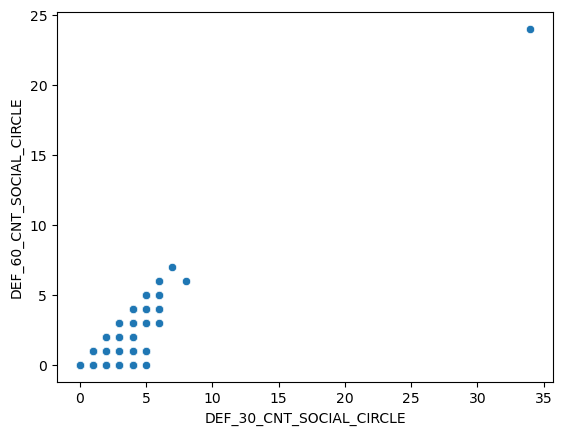

In [85]:

sns.scatterplot(appl_data['DEF_30_CNT_SOCIAL_CIRCLE'],appl_data['DEF_60_CNT_SOCIAL_CIRCLE'])


LIVE_CITY_NOT_WORK_CITY and REG_CITY_NOT_WORK_CITY

<AxesSubplot:xlabel='LIVE_CITY_NOT_WORK_CITY', ylabel='REG_CITY_NOT_WORK_CITY'>

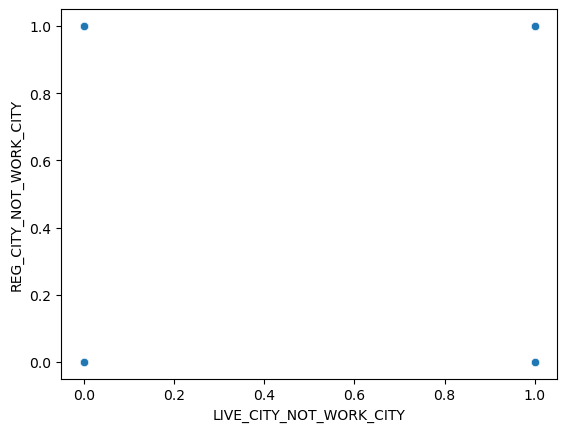

In [86]:

sns.scatterplot(appl_data['LIVE_CITY_NOT_WORK_CITY'],appl_data['REG_CITY_NOT_WORK_CITY'])


# SEGMENTING THE DATA BASED ON DEFAULTERS AND NON-DEFAULTERS

In [87]:
defaulters=appl_data[appl_data['TARGET']==1]
non_defaulters=appl_data[appl_data['TARGET']==0]
defaulters.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_EMAIL                       int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT_W_CITY      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY   

In [88]:
#checking imbalance in the data
target_1=defaulters.shape[0]
target_0=non_defaulters.shape[0]

In [89]:
# Ratio of non_defaulters todefaulters
target_0/target_1

11.363951752793577

In [90]:
categorical_cols=defaulters.dtypes[defaulters.dtypes=='object'].index
categorical_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE'],
      dtype='object')

Plotting count plots for defauters and non-defaulters for every categorical column

**NAME_CONTRACT_TYPE**

(array([0, 1]), [Text(0, 0, 'Cash loans'), Text(1, 0, 'Revolving loans')])

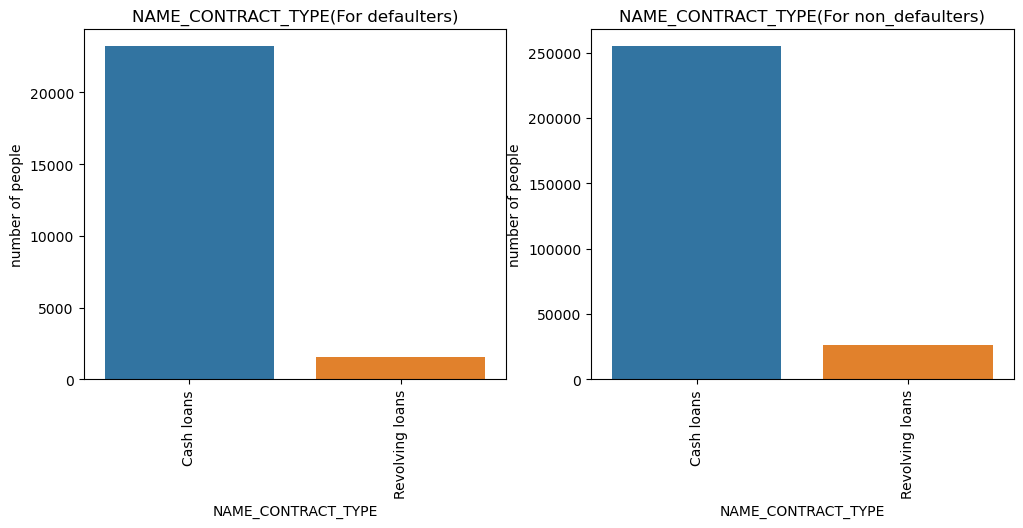

In [91]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(defaulters['NAME_CONTRACT_TYPE'])    
plt.title('NAME_CONTRACT_TYPE(For defaulters)')
plt.ylabel('number of people')
plt.xticks(rotation=90)
    
    

plt.subplot(2,2,2)
sns.countplot(non_defaulters['NAME_CONTRACT_TYPE'])
plt.title('NAME_CONTRACT_TYPE(For non_defaulters)')
plt.ylabel('number of people')
plt.xticks(rotation=90)

**OBSERVATIONS**
* The people who are defaulters: more people have applied for cash loans than revolving loans
* The people who are non-defaulters: more people have applied for cash loans than revolving loans

**CODE_GENDER**

(array([0, 1, 2]), [Text(0, 0, 'F'), Text(1, 0, 'M'), Text(2, 0, 'XNA')])

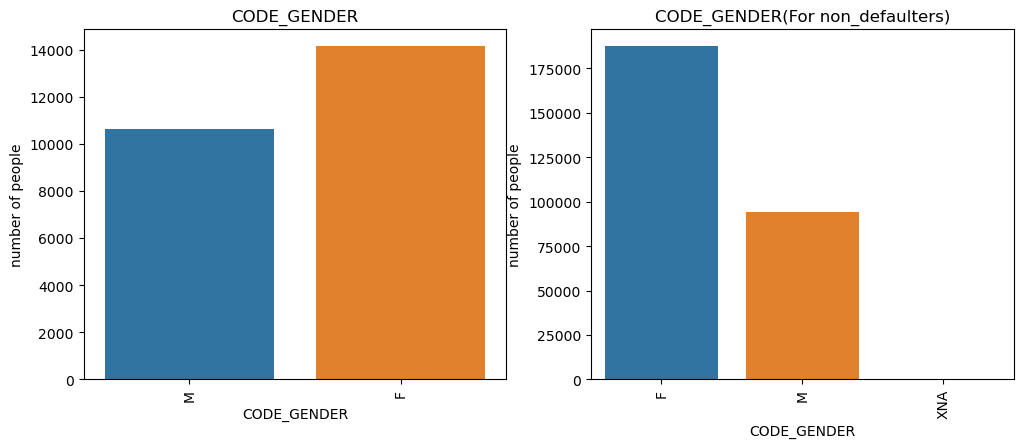

In [92]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(defaulters['CODE_GENDER'])    
plt.title('CODE_GENDER')
plt.ylabel('number of people')
plt.xticks(rotation=90)
    
    

plt.subplot(2,2,2)
sns.countplot(non_defaulters['CODE_GENDER'])
plt.title('CODE_GENDER(For non_defaulters)')
plt.ylabel('number of people')
plt.xticks(rotation=90)

**OBSERVATION**
* The people who are defaulters: there are more female than male
* The people who are non-defaulters: there are more female than male

**FLAG_OWN_CAR**

(array([0, 1]), [Text(0, 0, 'N'), Text(1, 0, 'Y')])

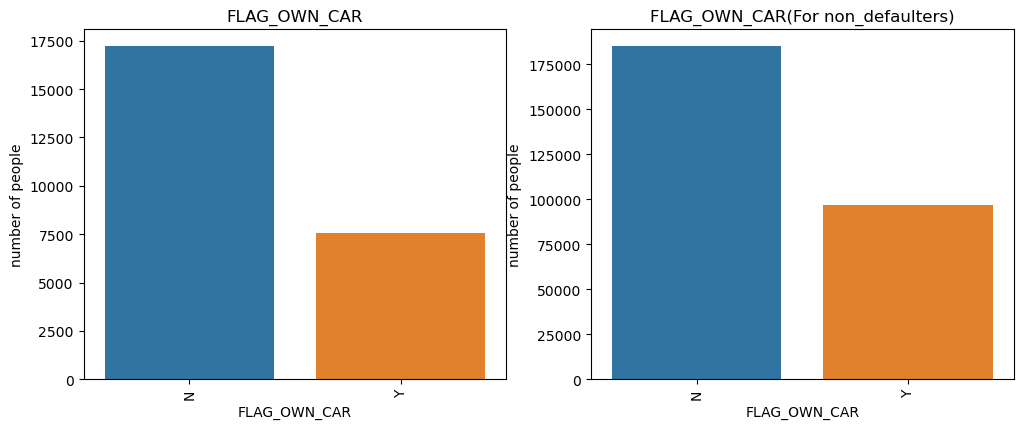

In [93]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(defaulters['FLAG_OWN_CAR'])    
plt.title('FLAG_OWN_CAR')
plt.ylabel('number of people')
plt.xticks(rotation=90)
    
    

plt.subplot(2,2,2)
sns.countplot(non_defaulters['FLAG_OWN_CAR'])
plt.title('FLAG_OWN_CAR(For non_defaulters)')
plt.ylabel('number of people')
plt.xticks(rotation=90)

**OBSERVATIONS**
* The people who are defaulters: There are more people who donot have a car than people having car
* The people who are non-defaulters: There are more people who donot have a car than people having car



**FLAG_OWN_REALTY**

(array([0, 1]), [Text(0, 0, 'N'), Text(1, 0, 'Y')])

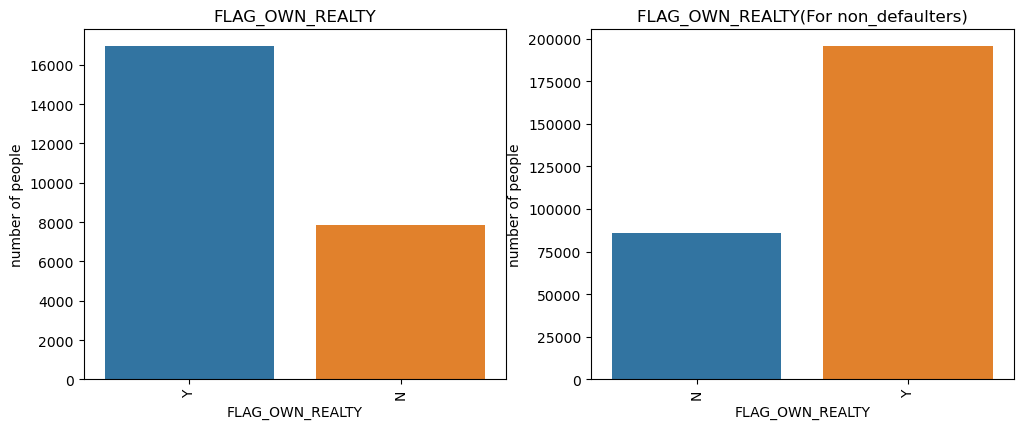

In [94]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(defaulters['FLAG_OWN_REALTY'])    
plt.title('FLAG_OWN_REALTY')
plt.ylabel('number of people')
plt.xticks(rotation=90)
    
    

plt.subplot(2,2,2)
sns.countplot(non_defaulters['FLAG_OWN_REALTY'])
plt.title('FLAG_OWN_REALTY(For non_defaulters)')
plt.ylabel('number of people')
plt.xticks(rotation=90)

**OBSERVATIONS**
* The people who are defaulters: There are more people who have realty than people who donot have realty.
* The people who are non defaulters: There are more people who have realty than people who donot have realty.



**NAME_INCOME_TYPE**

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'State servant'),
  Text(1, 0, 'Working'),
  Text(2, 0, 'Commercial associate'),
  Text(3, 0, 'Pensioner'),
  Text(4, 0, 'Unemployed'),
  Text(5, 0, 'Student'),
  Text(6, 0, 'Businessman'),
  Text(7, 0, 'Maternity leave')])

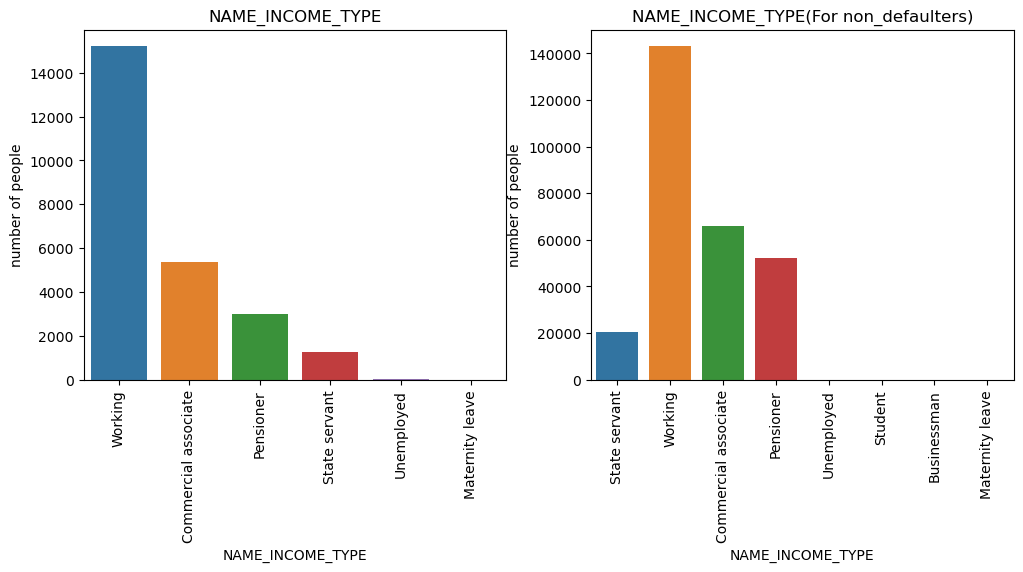

In [95]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(defaulters['NAME_INCOME_TYPE'])    
plt.title('NAME_INCOME_TYPE')
plt.ylabel('number of people')
plt.xticks(rotation=90)
    
    

plt.subplot(2,2,2)
sns.countplot(non_defaulters['NAME_INCOME_TYPE'])
plt.title('NAME_INCOME_TYPE(For non_defaulters)')
plt.ylabel('number of people')
plt.xticks(rotation=90)

**OBSERVATIONS**
* The people who are defaulters: There are more people who are working followed by people who are commercial associates.
* The people who are non defaulters: There are more people who are working followed by people who are commercial associates.



**NAME_EDUCATION_TYPE**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Higher education'),
  Text(1, 0, 'Secondary / secondary special'),
  Text(2, 0, 'Incomplete higher'),
  Text(3, 0, 'Lower secondary'),
  Text(4, 0, 'Academic degree')])

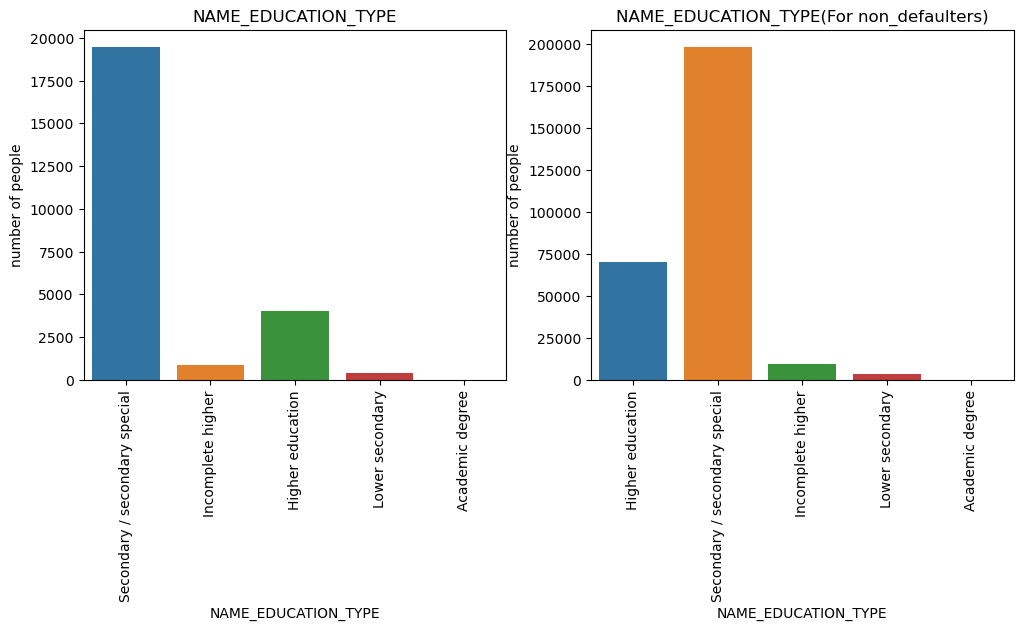

In [96]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(defaulters['NAME_EDUCATION_TYPE'])    
plt.title('NAME_EDUCATION_TYPE')
plt.ylabel('number of people')
plt.xticks(rotation=90)
    
    

plt.subplot(2,2,2)
sns.countplot(non_defaulters['NAME_EDUCATION_TYPE'])
plt.title('NAME_EDUCATION_TYPE(For non_defaulters)')
plt.ylabel('number of people')
plt.xticks(rotation=90)

**OBSERVATIONS**
* The people who are defaulters: Majority of the people have Secondary/secondary specail education.
* The people who are non defaulters: Majority of the people have Secondary/secondary specail education.



**NAME_FAMILY_STATUS**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Married'),
  Text(1, 0, 'Single / not married'),
  Text(2, 0, 'Civil marriage'),
  Text(3, 0, 'Widow'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Unknown')])

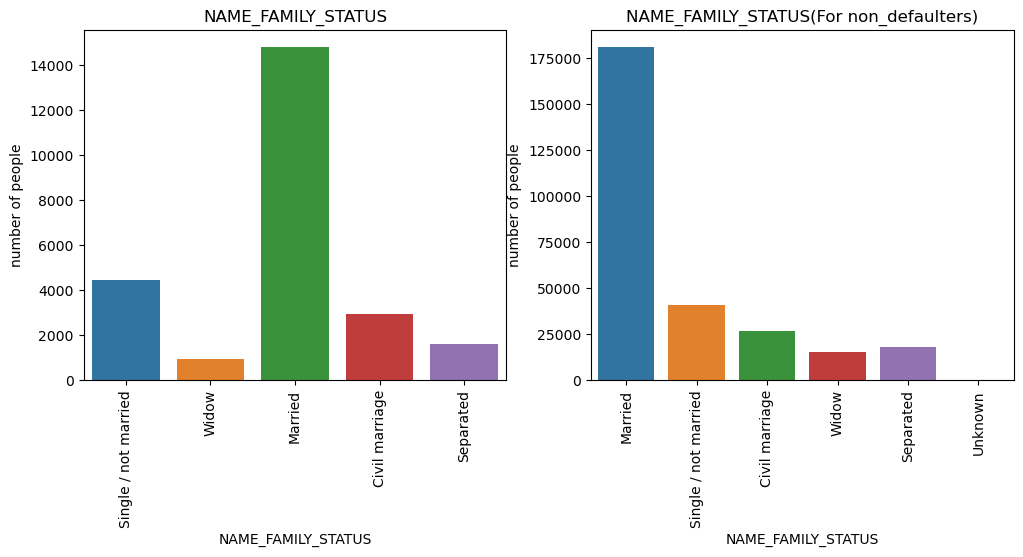

In [97]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(defaulters['NAME_FAMILY_STATUS'])    
plt.title('NAME_FAMILY_STATUS')
plt.ylabel('number of people')
plt.xticks(rotation=90)
    
    

plt.subplot(2,2,2)
sns.countplot(non_defaulters['NAME_FAMILY_STATUS'])
plt.title('NAME_FAMILY_STATUS(For non_defaulters)')
plt.ylabel('number of people')
plt.xticks(rotation=90)

**OBSERVATIONS**
* The people who are defaulters: Majority of the people are married.
* The people who are non defaulters: Majority of the people are married


**NAME_HOUSING_TYPE**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'House / apartment'),
  Text(1, 0, 'Rented apartment'),
  Text(2, 0, 'With parents'),
  Text(3, 0, 'Municipal apartment'),
  Text(4, 0, 'Office apartment'),
  Text(5, 0, 'Co-op apartment')])

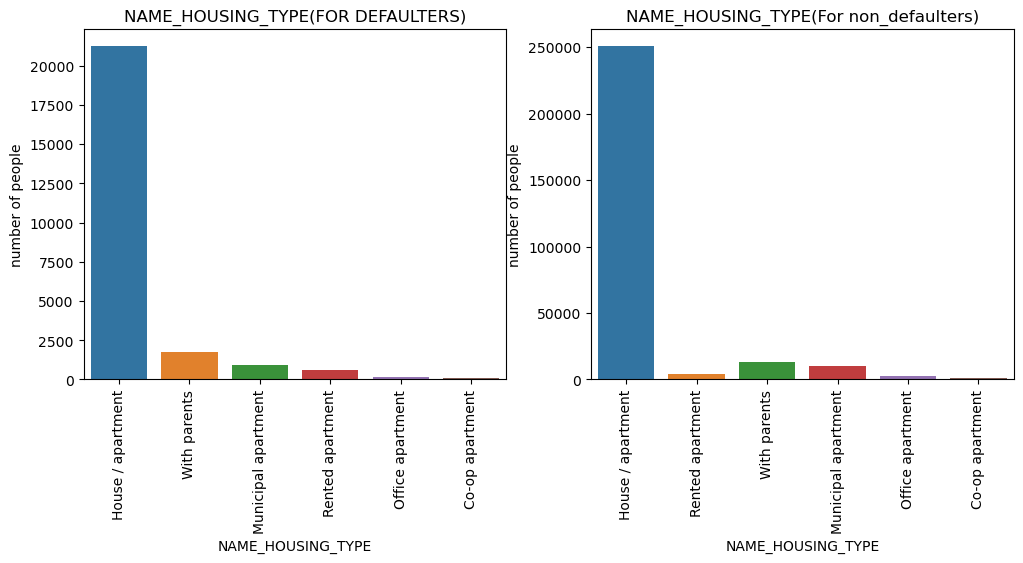

In [98]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(defaulters['NAME_HOUSING_TYPE'])    
plt.title('NAME_HOUSING_TYPE(FOR DEFAULTERS)')
plt.ylabel('number of people')
plt.xticks(rotation=90)
    
    

plt.subplot(2,2,2)
sns.countplot(non_defaulters['NAME_HOUSING_TYPE'])
plt.title('NAME_HOUSING_TYPE(For non_defaulters)')
plt.ylabel('number of people')
plt.xticks(rotation=90)

**OBSERVATIONS**
* The people who are defaulters: Majority of the people live in house/appartment
* The people who are non-defaulters: Majority of the people live in house/appartment


**OCCUPATION_TYPE**

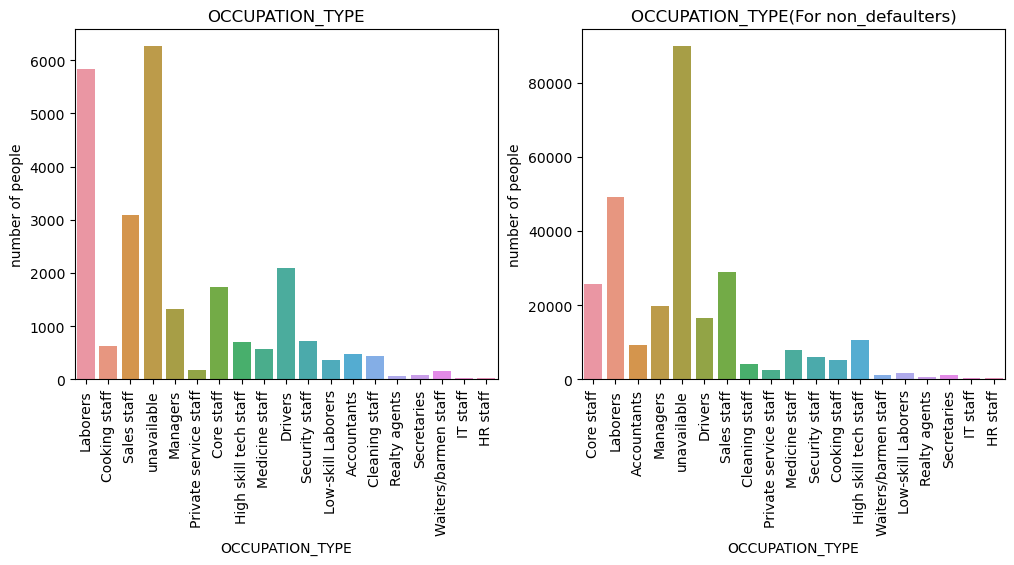

In [99]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(defaulters['OCCUPATION_TYPE'])    
plt.title('OCCUPATION_TYPE')
plt.ylabel('number of people')
plt.xticks(rotation=90)
    
    

plt.subplot(2,2,2)
sns.countplot(non_defaulters['OCCUPATION_TYPE'])
plt.title('OCCUPATION_TYPE(For non_defaulters)')
plt.ylabel('number of people')
plt.xticks(rotation=90);

**Plotting count plots for defauters and non-defaulters for every numerical column column**

In [100]:
numerical_cols=defaulters.dtypes[defaulters.dtypes!='object'].index
numerical_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH'],
      dtype='object')

**CNT_CHILDREN**

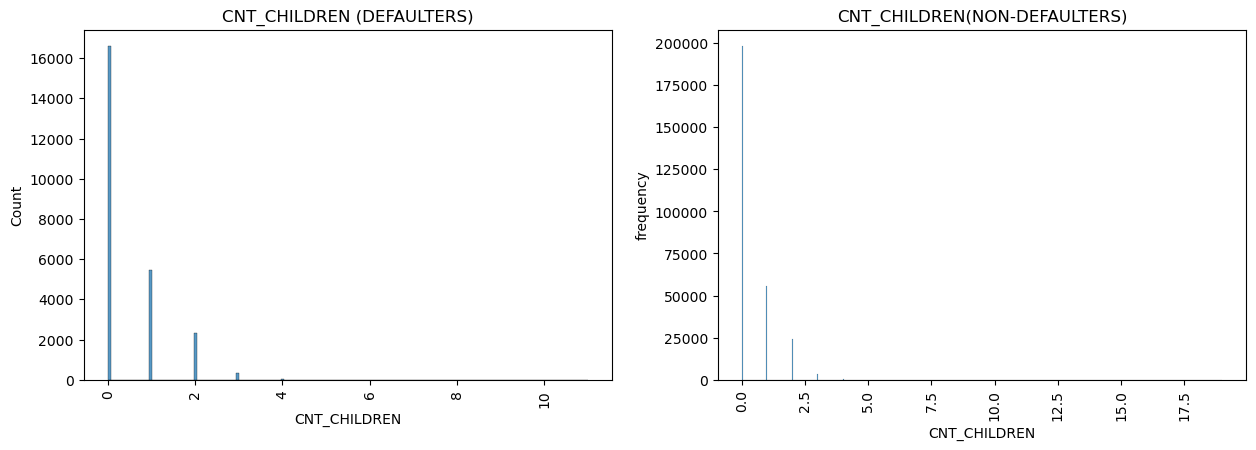

In [101]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(defaulters['CNT_CHILDREN'])    
plt.title('CNT_CHILDREN (DEFAULTERS)')
plt.xticks(rotation=90);

plt.subplot(2,2,2)
sns.histplot(non_defaulters['CNT_CHILDREN'])
plt.title('CNT_CHILDREN(NON-DEFAULTERS)')
plt.ylabel('frequency')
plt.xticks(rotation=90);

**OBSERVATIONS**\
*for defaulters:We see that most of the people who are defaulters have no children and very few people have more than 5 children.*\
*for non defaulters:We see that most of the people who are non defaulters have no children and very few people have more than 4 children.*

**AMT_INCOME_TOTAL**

Binning income column of both defaulters and non defaulters dataframe into low,medium,high, very high groups.

In [102]:
appl_data['AMT_INCOME_TOTAL'].describe()

count    3.064900e+05
mean     1.686301e+05
std      2.372656e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.453500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [103]:
def amt_income(x):
    if x<=100000:
        return "low"
    elif x>100000 and x<=150000:
        return "medium"
    elif x>150000 and x<=200000:
        return "high"
    else:
        return "very high"


In [104]:
non_defaulters['INCOME']=non_defaulters['AMT_INCOME_TOTAL'].apply(amt_income)

In [105]:
defaulters['INCOME']=defaulters['AMT_INCOME_TOTAL'].apply(amt_income)

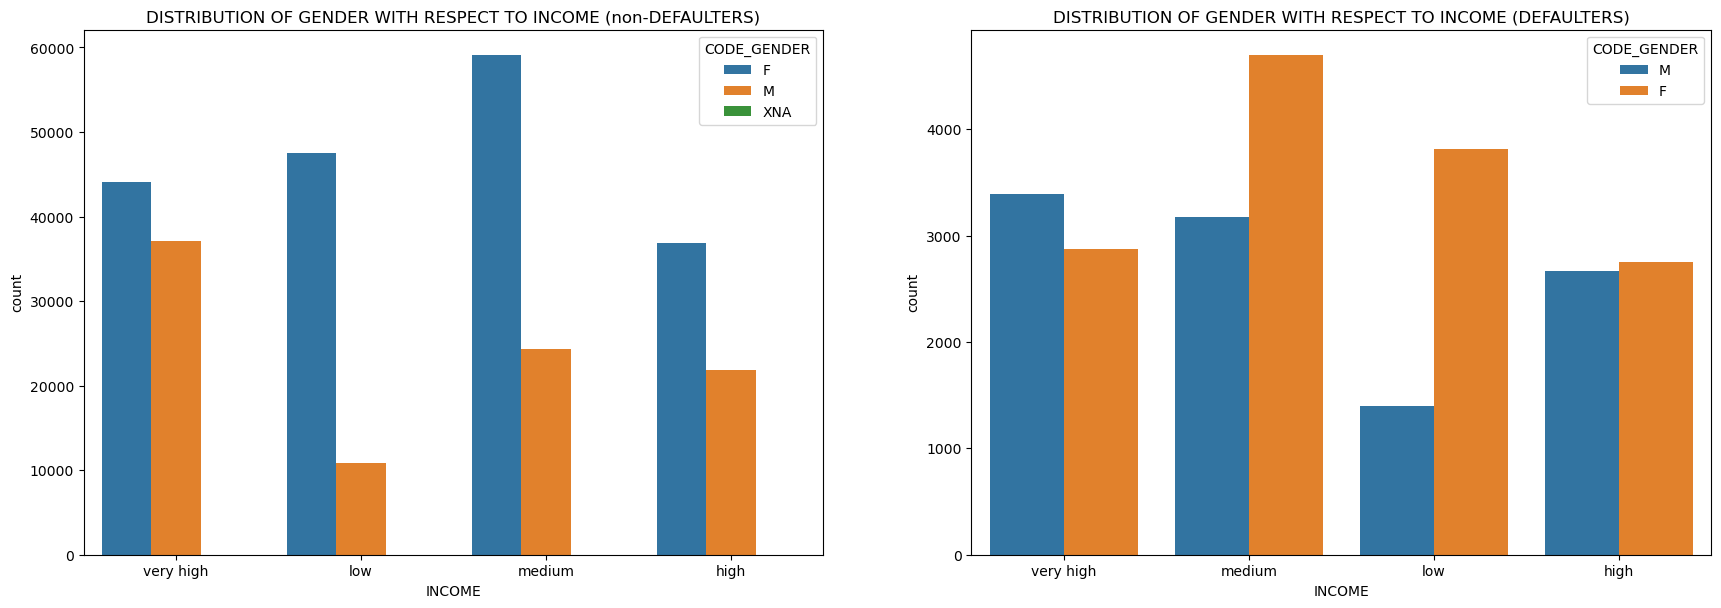

In [106]:
plt.figure(figsize=(21,15))
plt.subplot(2,2,1)
sns.countplot(non_defaulters['INCOME'],hue=non_defaulters['CODE_GENDER'])    
plt.title('DISTRIBUTION OF GENDER WITH RESPECT TO INCOME (non-DEFAULTERS)')


plt.subplot(2,2,2)
sns.countplot(defaulters['INCOME'],hue=defaulters['CODE_GENDER'])
plt.title('DISTRIBUTION OF GENDER WITH RESPECT TO INCOME (DEFAULTERS)');


**OBSERVATIONS**
* we see there are applicants who have high income and who are defaulters.
* also we see there are people who have low income and are non defaulters.

**OBSERVATIONS**

**AMT_CREDIT**

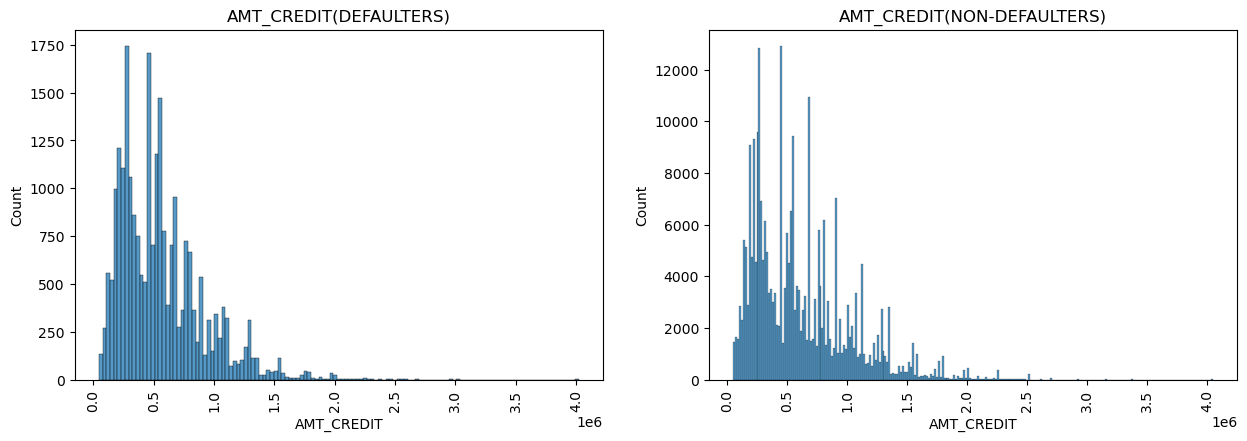

In [107]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(defaulters['AMT_CREDIT'])    
plt.title('AMT_CREDIT(DEFAULTERS)')
plt.xticks(rotation=90);

plt.subplot(2,2,2)
sns.histplot(non_defaulters['AMT_CREDIT'])
plt.title('AMT_CREDIT(NON-DEFAULTERS)')
plt.xticks(rotation=90);

**OBSERVATIONS**
* Both the plots we see the distribution is skewed towards the left

Binning amount credit  column into low,medium,high , very high groups

In [108]:
appl_data['AMT_CREDIT'].describe()

count    3.064900e+05
mean     5.995069e+05
std      4.025481e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.147775e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [109]:
def amt_credit(x):
    if x<=270000:
        return "low"
    elif x>270000 and x<=500000:
        return "medium"
    elif x>500000 and x<=800000:
        return "high"
    else:
        return "very high"

In [110]:
non_defaulters['CREDIT']=non_defaulters['AMT_CREDIT'].apply(amt_credit)

In [111]:
defaulters['CREDIT']=defaulters['AMT_CREDIT'].apply(amt_credit)

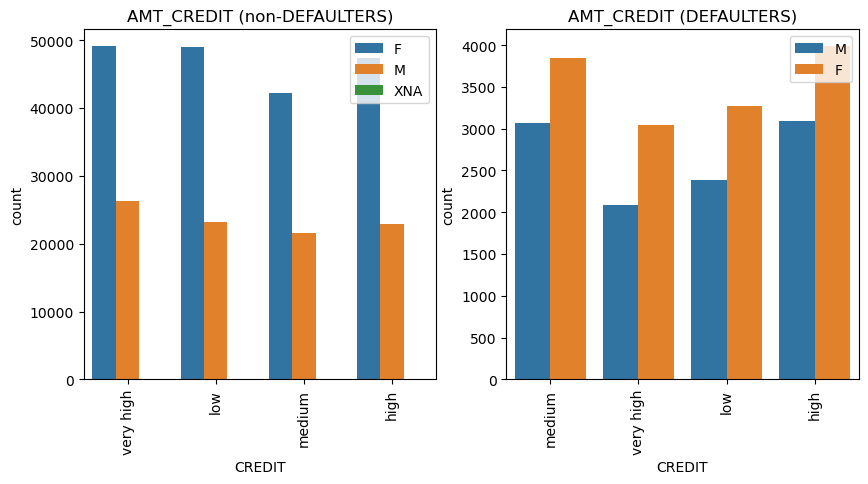

In [112]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(non_defaulters['CREDIT'],hue=non_defaulters['CODE_GENDER'])    
plt.title('AMT_CREDIT (non-DEFAULTERS)')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

plt.subplot(2,2,2)
sns.countplot(defaulters['CREDIT'],hue=defaulters['CODE_GENDER'])
plt.title('AMT_CREDIT (DEFAULTERS)')
plt.xticks(rotation=90)
plt.legend(loc='upper right');

**OBSERVATIONS**
* There are majority of people whose amount credit is low for who are non defaulters
* There are signifiacntly less number of people with high credit value in both defauters and non-defaulters category

**AMT_ANNUITY**

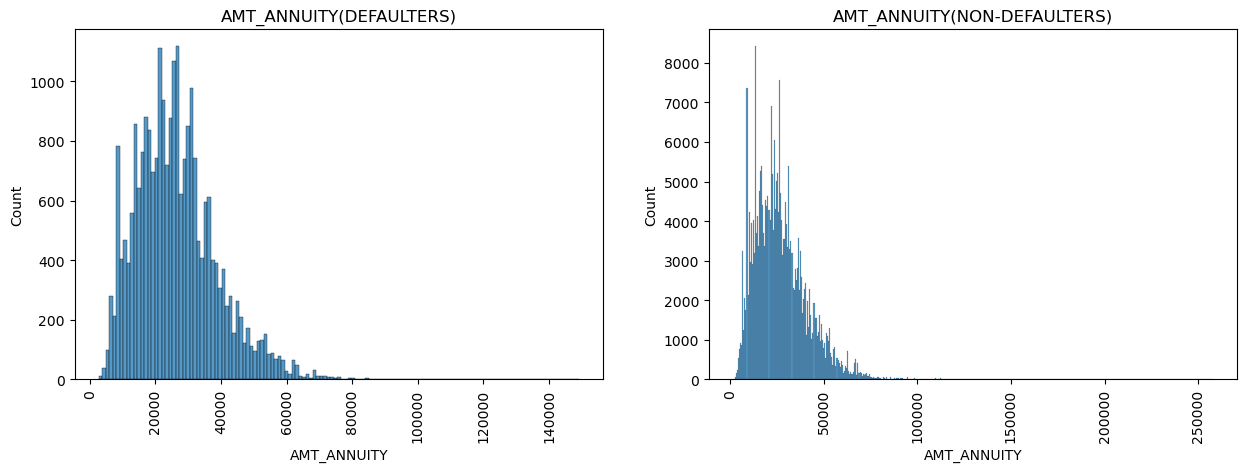

In [113]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(defaulters['AMT_ANNUITY'])    
plt.title('AMT_ANNUITY(DEFAULTERS)')
plt.xticks(rotation=90);

plt.subplot(2,2,2)
sns.histplot(non_defaulters['AMT_ANNUITY'])
plt.title('AMT_ANNUITY(NON-DEFAULTERS)')
plt.xticks(rotation=90);

**OBSERVATIONS**\
In both the plots the distribution is left skewed. 

**AMT_GOODS_PRICE**

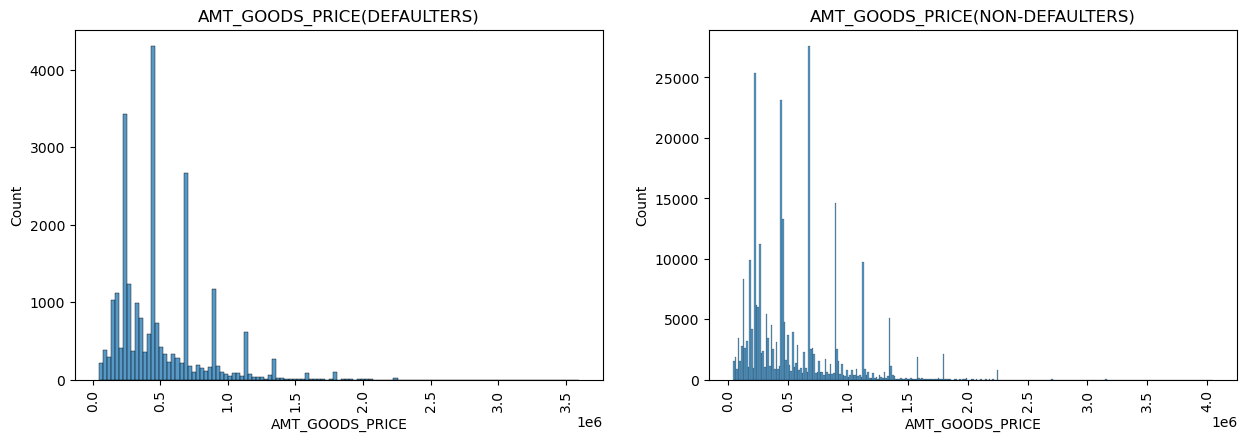

In [114]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(defaulters['AMT_GOODS_PRICE'])    
plt.title('AMT_GOODS_PRICE(DEFAULTERS)')
plt.xticks(rotation=90);

plt.subplot(2,2,2)
sns.histplot(non_defaulters['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE(NON-DEFAULTERS)')
plt.xticks(rotation=90);

**OBSERVATIONS**
* In both the plots the distribution is left skewed.

**CNT_FAM_MEMBERS**

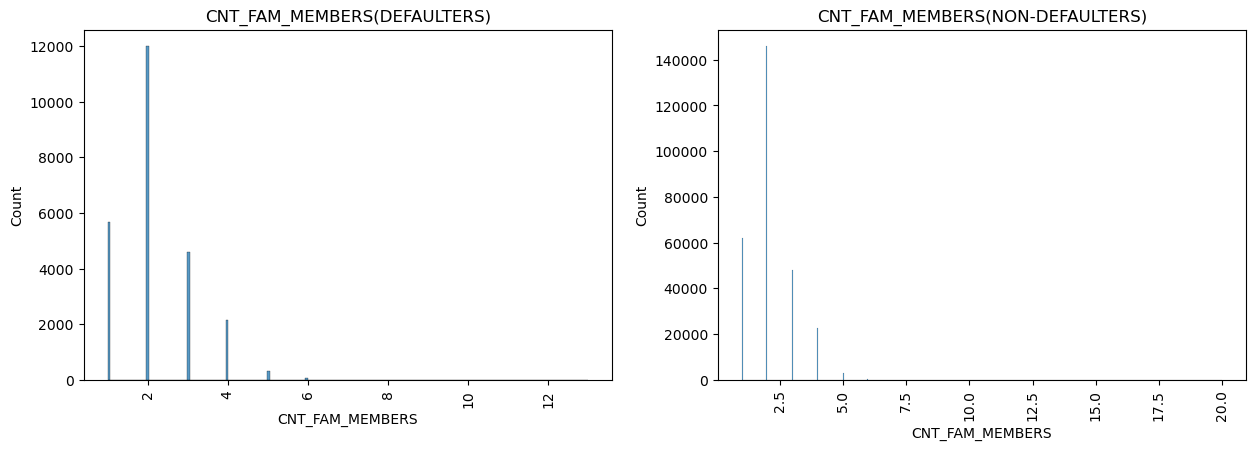

In [115]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(defaulters['CNT_FAM_MEMBERS'])    
plt.title('CNT_FAM_MEMBERS(DEFAULTERS)')
plt.xticks(rotation=90);

plt.subplot(2,2,2)
sns.histplot(non_defaulters['CNT_FAM_MEMBERS'])
plt.title('CNT_FAM_MEMBERS(NON-DEFAULTERS)')
plt.xticks(rotation=90);

**OBSERVATIONS**
* In both the plots we very similar distribution.
* Majority of the people who are defauters have 2 members in their family.
* Majority of the people who are non defauters have 2 members in their family.


**AGE**

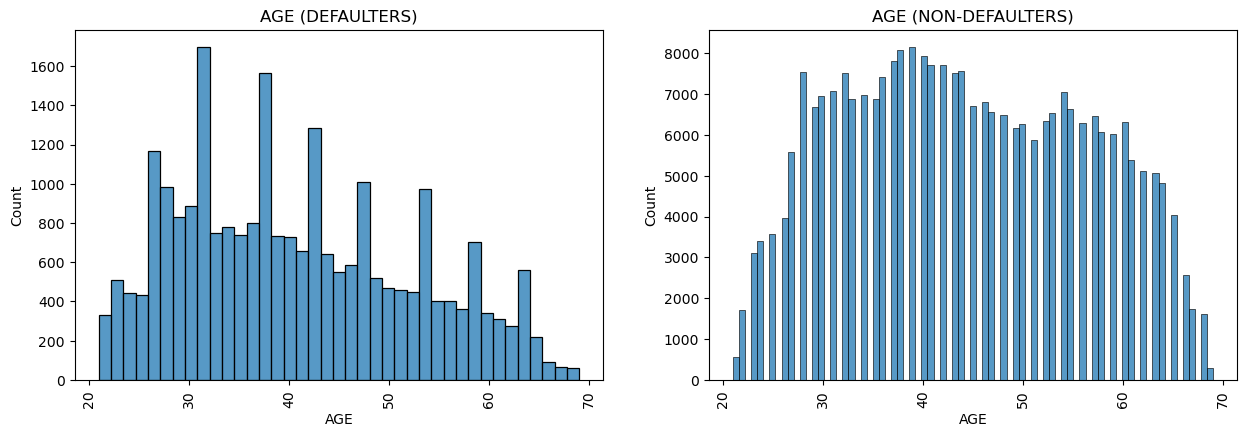

In [116]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(defaulters['AGE'])    
plt.title('AGE (DEFAULTERS)')
plt.xticks(rotation=90);

plt.subplot(2,2,2)
sns.histplot(non_defaulters['AGE'])
plt.title('AGE (NON-DEFAULTERS)')
plt.xticks(rotation=90);

**OBSERVATIONS**
* IN the defaulters plot, we see there is a decline in the number of applicants as the age increases.


**YEARS_EMPLOYED**


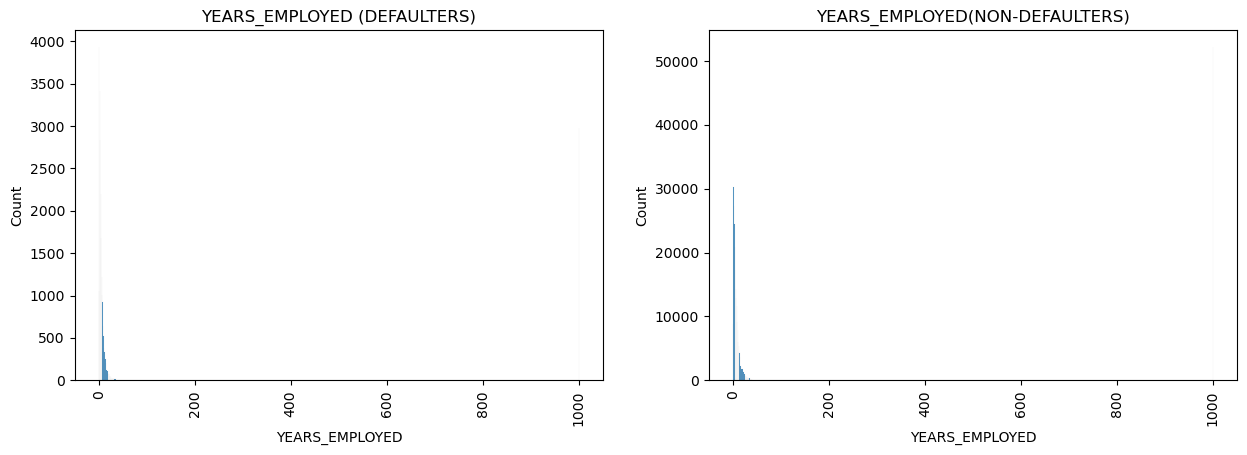

In [117]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(defaulters['YEARS_EMPLOYED'])    
plt.title('YEARS_EMPLOYED (DEFAULTERS)')
plt.xticks(rotation=90);

plt.subplot(2,2,2)
sns.histplot(non_defaulters['YEARS_EMPLOYED'])
plt.title('YEARS_EMPLOYED(NON-DEFAULTERS)')
plt.xticks(rotation=90);

**OBSERVATION**
We cannot conclude anything from the above plots. Its because the YEARS_EMPLOYED column has outliers

In [118]:
x=np.percentile(defaulters['YEARS_EMPLOYED'],99)
new1=defaulters[defaulters['YEARS_EMPLOYED']<x]['YEARS_EMPLOYED']
new2=non_defaulters[non_defaulters['YEARS_EMPLOYED']<x]['YEARS_EMPLOYED']

* DESCRIPTION OF THE ABOVE CODE
    * CREATED TWO NEW SERIES FROM THE DEFAULTERS AND NON DEFAULTERS DATAFRAME REMOVING THE OUTLIERS
*NOW PLOTTING HISTOGRAM OF THE NEW SERIES    

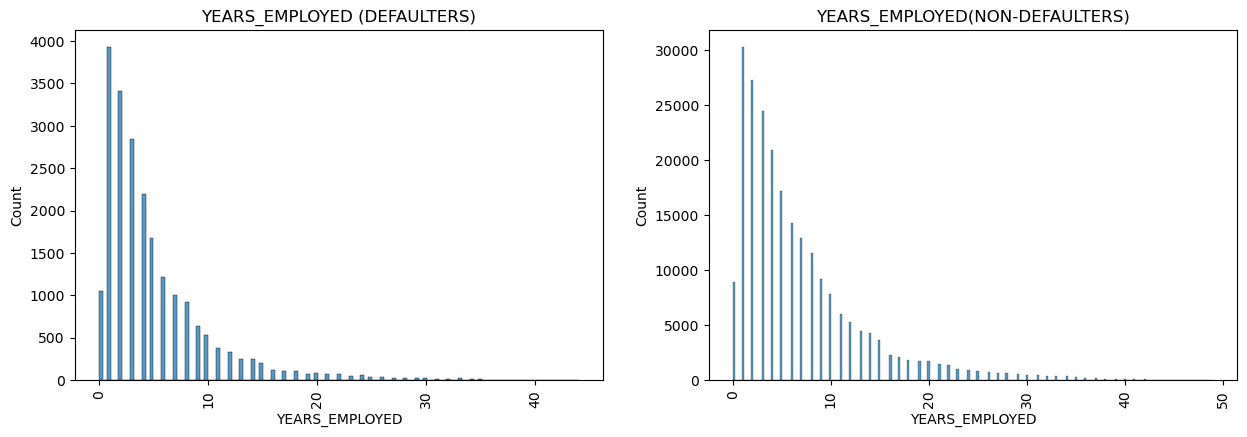

In [119]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(new1)    
plt.title('YEARS_EMPLOYED (DEFAULTERS)')
plt.xticks(rotation=90);

plt.subplot(2,2,2)
sns.histplot(new2)
plt.title('YEARS_EMPLOYED(NON-DEFAULTERS)')
plt.xticks(rotation=90);

**PLOTTING HEATMAP FOR NUMERICAL COLUMNS IN THE defaulters columns**

<AxesSubplot:>

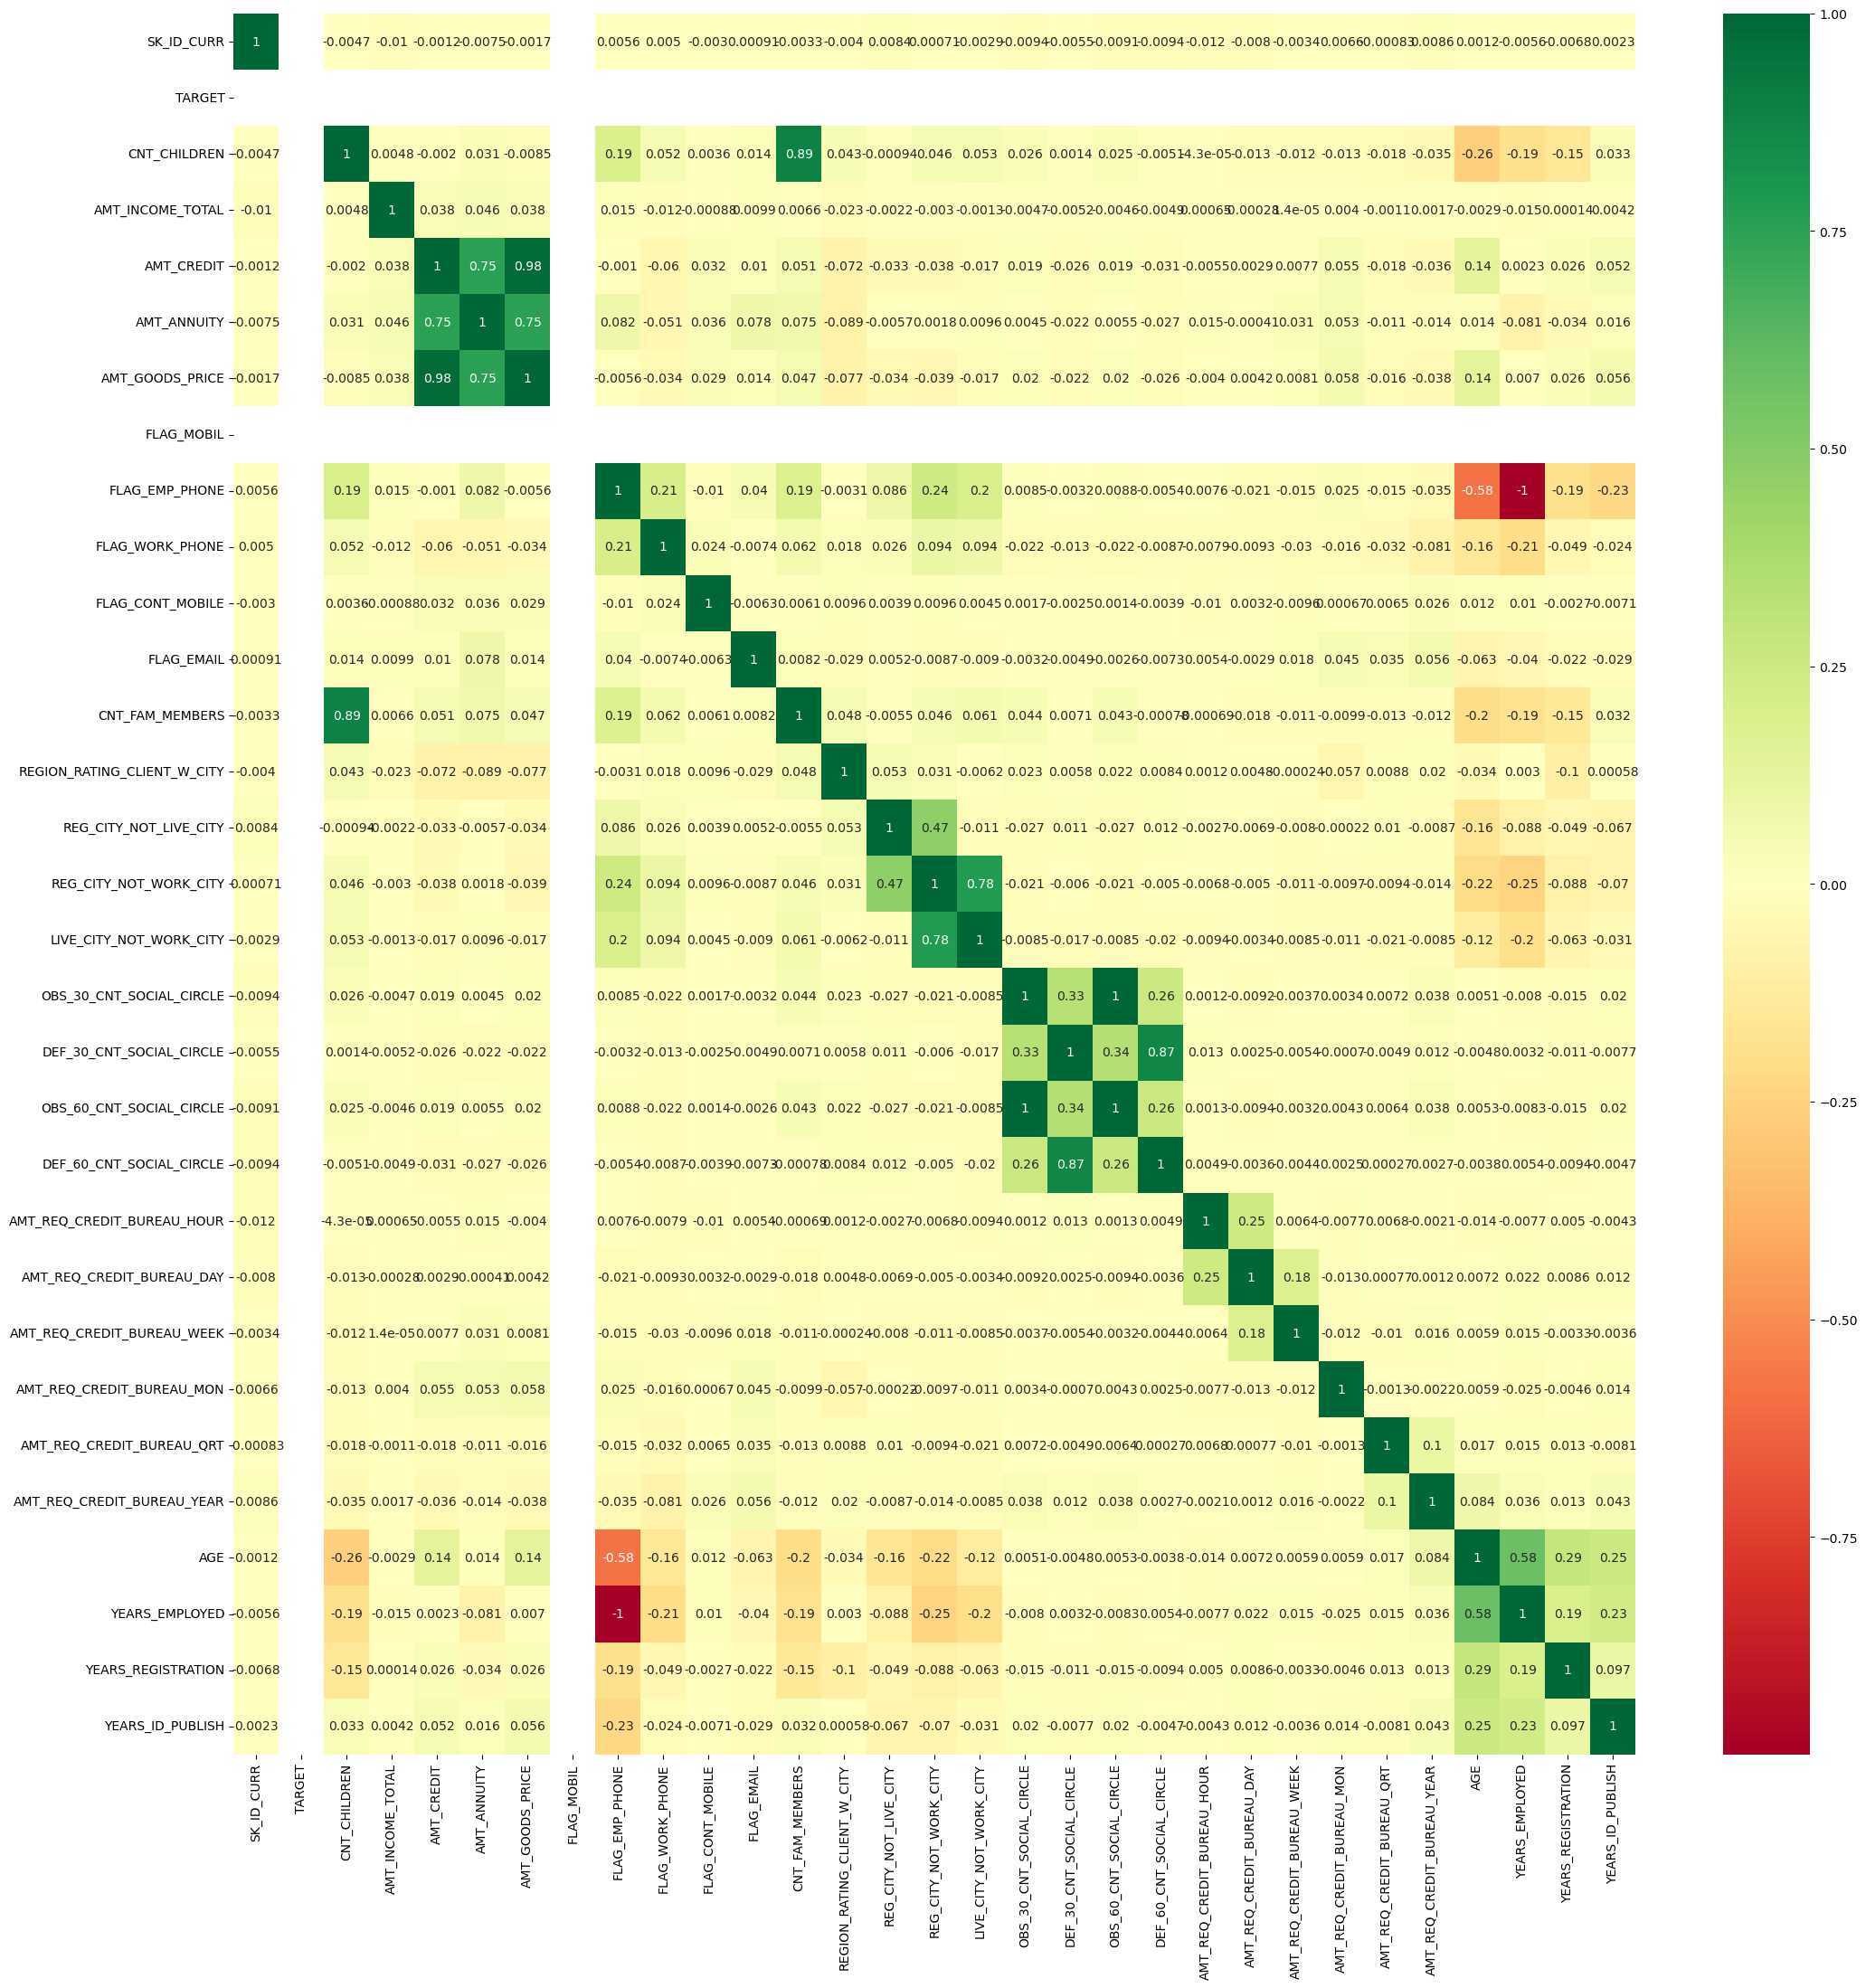

In [120]:
plt.figure(figsize=(25,25))
sns.heatmap(defaulters[numerical_cols].corr(),square=False,cmap='RdYlGn',annot=True)

PLOTTING HEATMAP FOR NUMERICAL COLUMNS IN THE non_defaulters columns

<AxesSubplot:>

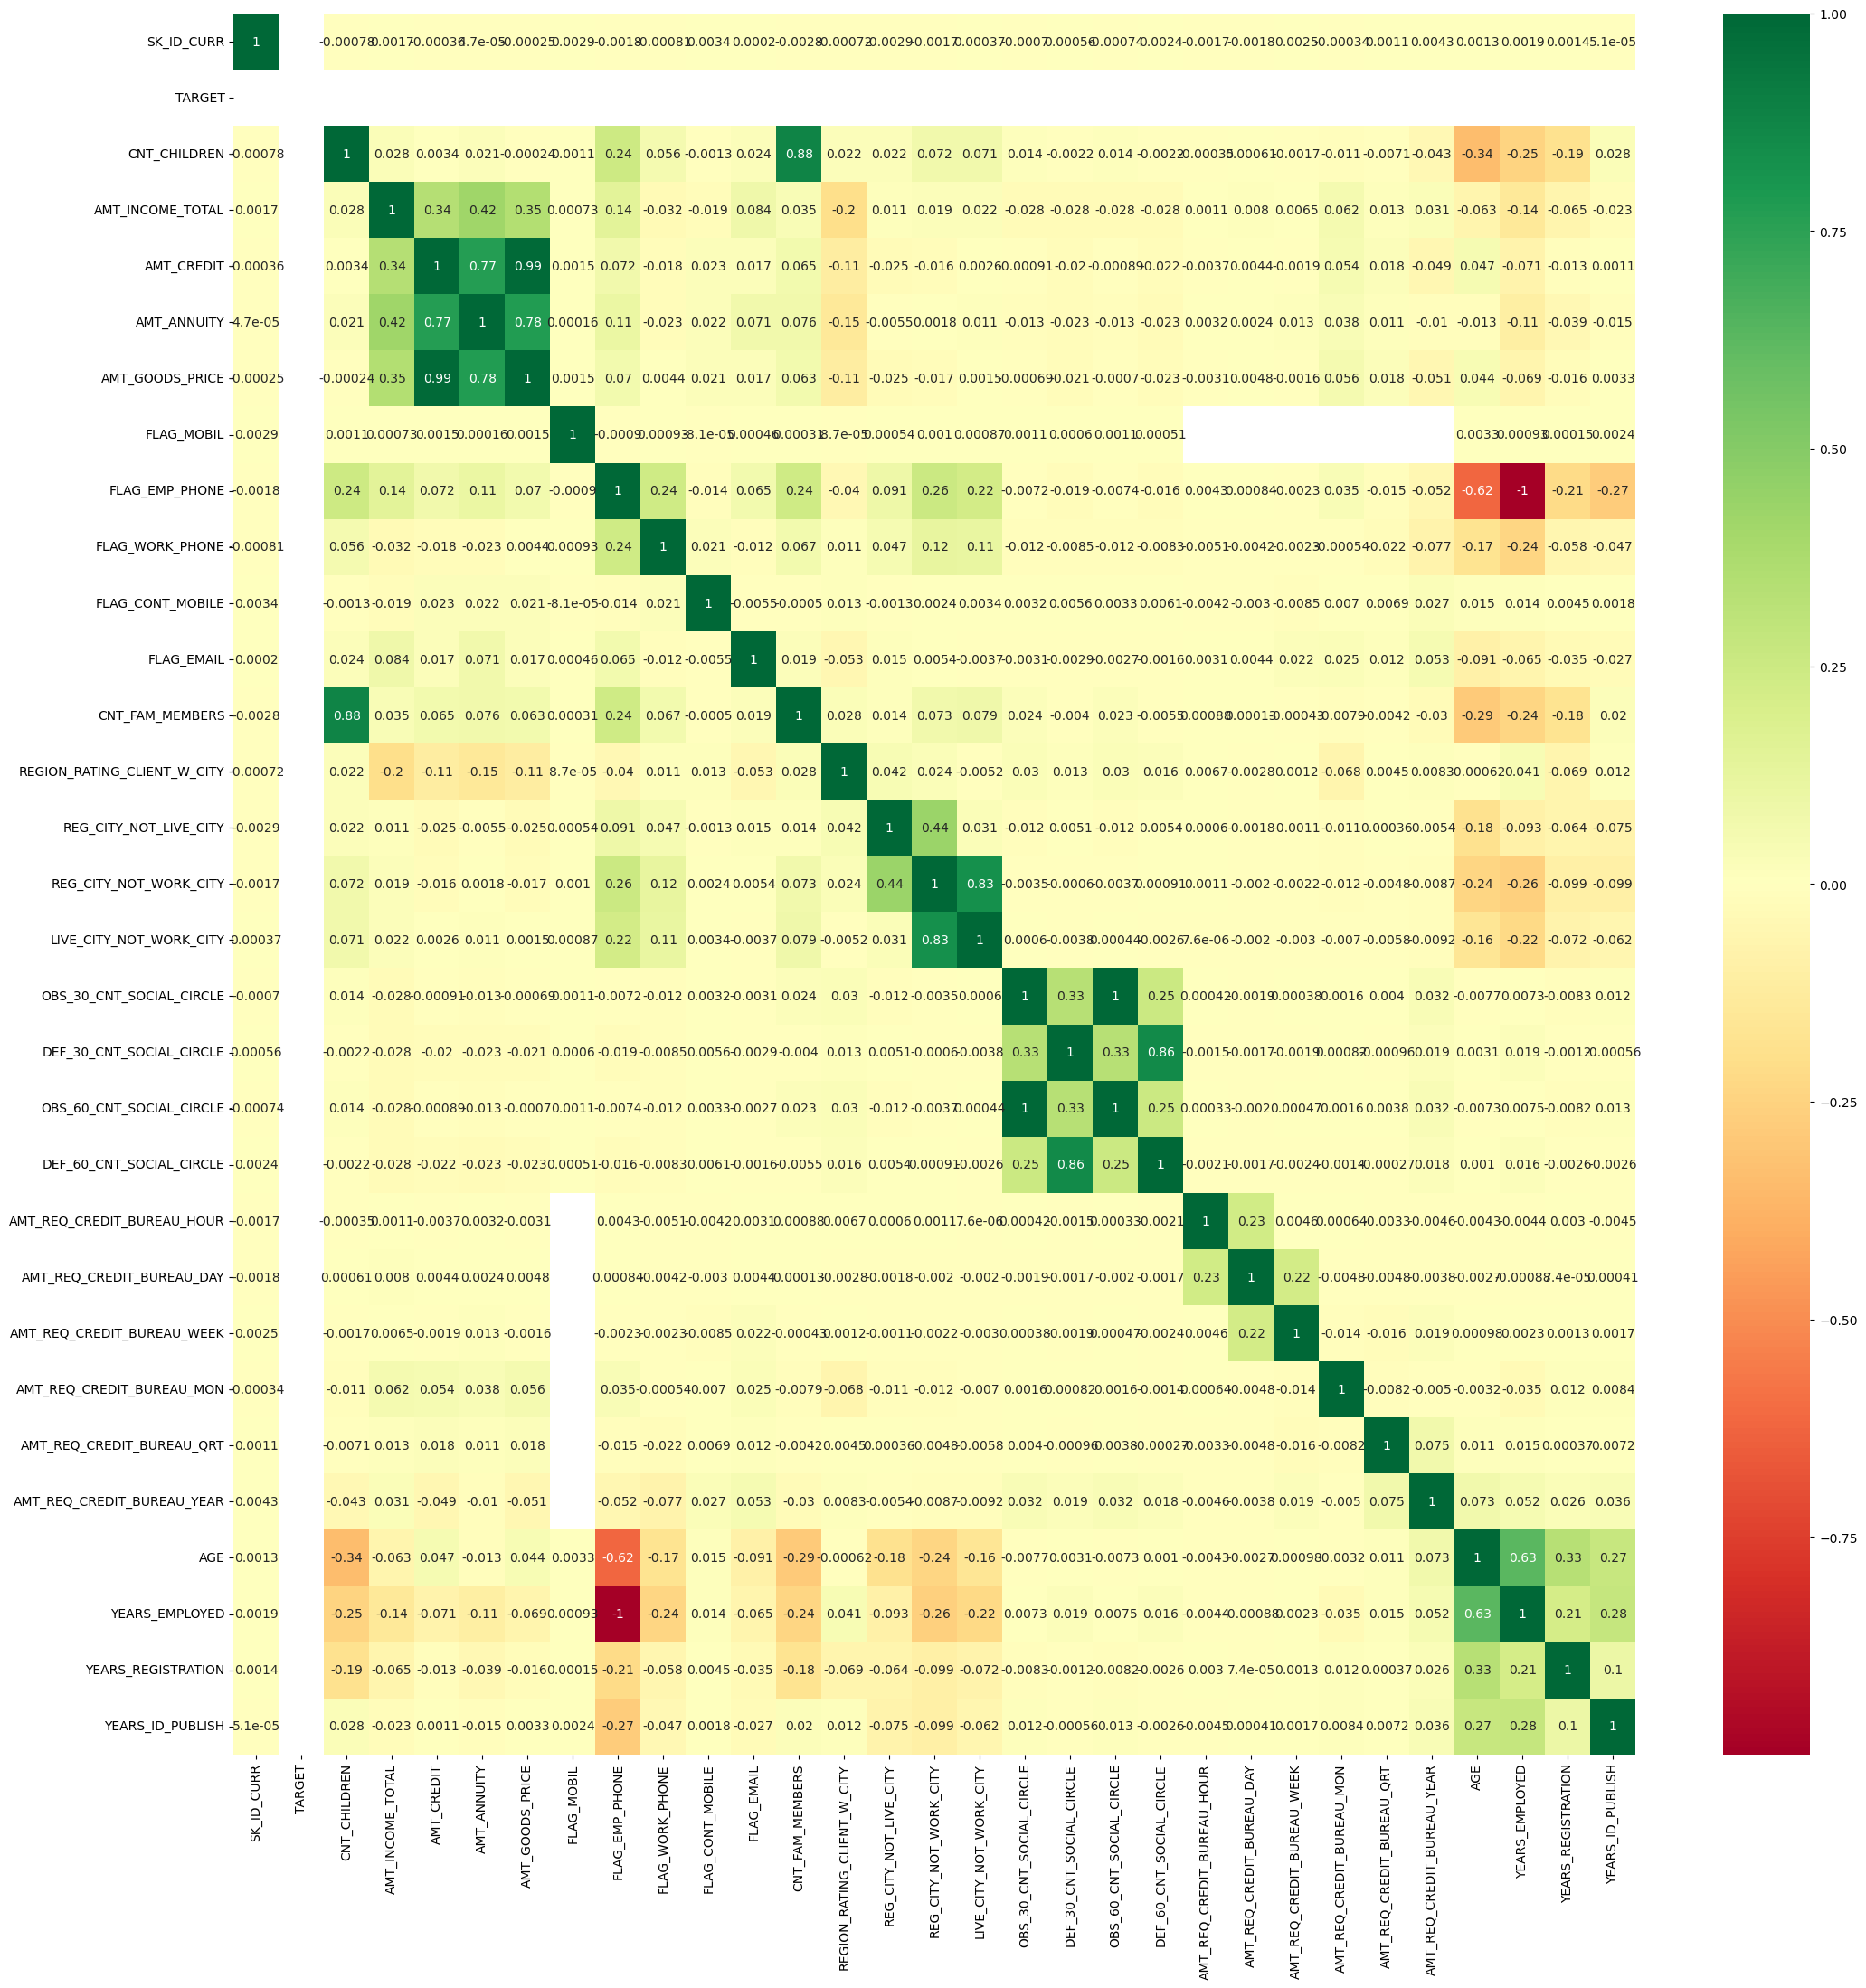

In [121]:
plt.figure(figsize=(25,25))

sns.heatmap(non_defaulters[numerical_cols].corr(),cmap='RdYlGn',annot=True)

# PREVIOUS APPLICATION DATASET

In [122]:
# PREVIOUS APPLICATION DATA SET

In [123]:
prev_appl=pd.read_csv('previous_application.csv')


In [124]:
prev_appl.head()


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [125]:
prev_appl.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [126]:
prev_appl.shape


(1670214, 37)

In [127]:
prev_appl.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [128]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

# Handling missing values in previous application column

In [129]:
cols_to_drop=(prev_appl.isnull().mean()*100)[(prev_appl.isnull().mean()*100)>40]
cols_to_drop  # columns with more than 40% missing values

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [130]:
#dropping columns with more than 40% missing values

In [131]:
prev_appl.drop(cols_to_drop.index,axis=1,inplace=True)

In [132]:
#checking null values in columns
(prev_appl.isnull().sum())[prev_appl.isnull().sum()>0]

AMT_ANNUITY            372235
AMT_CREDIT                  1
AMT_GOODS_PRICE        385515
CNT_PAYMENT            372230
PRODUCT_COMBINATION       346
dtype: int64

WEEKDAY_APPR_PROCESS_START: On which day of the week did the client apply for previous application
HOUR_APPR_PROCESS_START: Approximately at what day hour did the client apply for the previous application

WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START : these two columns seem irrelevant for out analysis

In [133]:
prev_appl.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'],axis=1,inplace=True)

In [134]:
prev_appl['PRODUCT_COMBINATION'].describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [135]:
# AMT_CREDIT and PRODUCT_COMBINATION columns have less than 1%
# filling the AMT_CREDIT column with median 
# PRODUCT_COMBINATION is a categorical column, filing the PRODUCT_COMBINATION column with mode
prev_appl['AMT_CREDIT'].fillna(prev_appl['AMT_CREDIT'].median(),inplace=True)
prev_appl['PRODUCT_COMBINATION'].fillna(prev_appl['PRODUCT_COMBINATION'].mode()[0],inplace=True)

In [136]:
prev_appl['AMT_ANNUITY'].describe()


count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [137]:
# filling null values AMT_ANNUITY with median
prev_appl['AMT_ANNUITY'].fillna(prev_appl['AMT_ANNUITY'].median(),inplace=True)

In [138]:
prev_appl['AMT_GOODS_PRICE'].describe()


count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [139]:
# filling null values of AMT_GOODS_PRICE with median
prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].median(),inplace=True)

In [140]:
prev_appl['CNT_PAYMENT'].describe()


count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [141]:
# filling null values of CNT_PAYMENT with median
prev_appl['CNT_PAYMENT'].fillna(prev_appl['CNT_PAYMENT'].median(),inplace=True)

fixing rows and columns

In [142]:
#coverting the negative entries in 'DAYS_DECISION' to possitive and converting days to year
prev_appl['Years_DECISION']=prev_appl['DAYS_DECISION'].apply(lambda x:abs(x)/365)

In [143]:
# we have made a new column Years_DECISION containing the entries of DAYS_DECISION in years. so we can drop DAYS_DECISION column
prev_appl.drop('DAYS_DECISION',axis=1, inplace=True)

# merging the application and previous application data frames on SK_ID_CURR

In [144]:
combined_data=appl_data.merge(prev_appl,how='inner',on='SK_ID_CURR')
# combined_data contains all the rows of prev_appl  which are common in appl_data with respect to the column SK_ID_CURR

In [145]:
combined_data.shape

(1410555, 65)

In [146]:
combined_data['NAME_CONTRACT_STATUS'].value_counts()

Approved        884083
Canceled        258824
Refused         244924
Unused offer     22724
Name: NAME_CONTRACT_STATUS, dtype: int64

In [147]:
# dividing the target column into 4 parts based on the status of loan

In [148]:
Approved=combined_data[combined_data['NAME_CONTRACT_STATUS']=='Approved']
Refused=combined_data[combined_data['NAME_CONTRACT_STATUS']=='Refused']
Canceled=combined_data[combined_data['NAME_CONTRACT_STATUS']=='Canceled']
Unused_offer=combined_data[combined_data['NAME_CONTRACT_STATUS']=='Unused offer']

In [149]:
Approved.shape

(884083, 65)

In [150]:
Refused.shape

(244924, 65)

In [151]:
Canceled.shape

(258824, 65)

In [152]:
Unused_offer.shape

(22724, 65)

Text(0, 0.5, 'count of people')

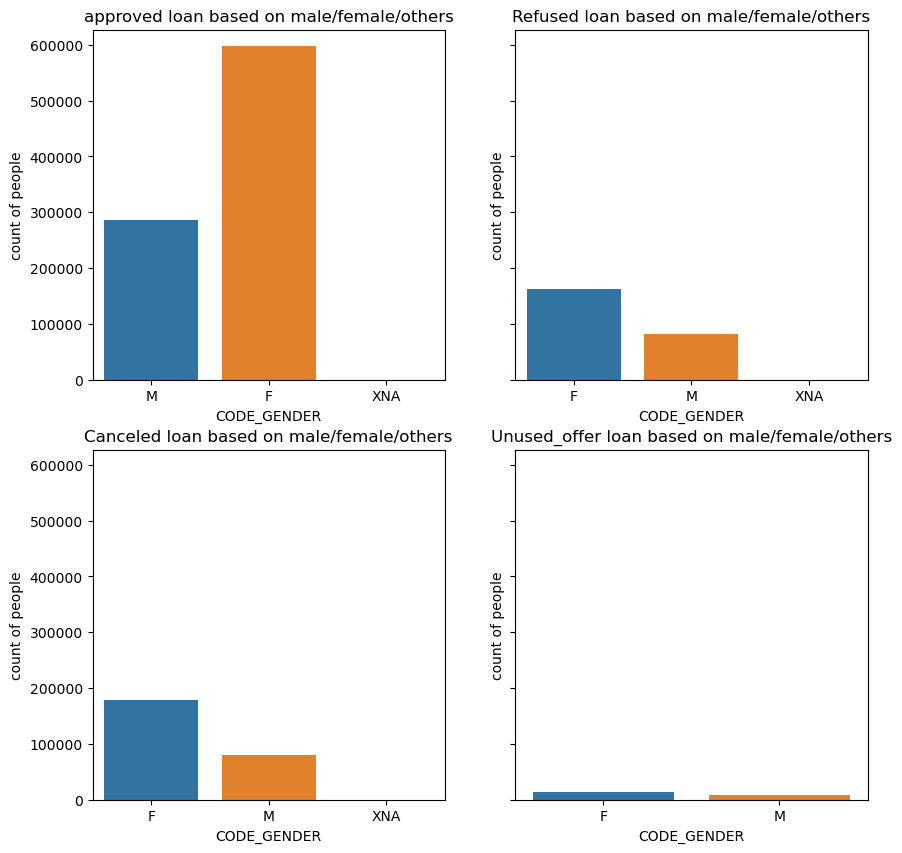

In [153]:
# Four Countplots showing distribution of Gender across the four dataframes:Approved,Refused,Canceled ,Unused_offer
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2, figsize=(10,10),sharey=True)
Ax1=sns.countplot(ax=ax1,x=Approved['CODE_GENDER'])
ax1.set_title('approved loan based on male/female/others')
ax1.set_ylabel('count of people')

Ax2=sns.countplot(ax=ax2,x=Refused['CODE_GENDER'])
ax2.set_title('Refused loan based on male/female/others')
ax2.set_ylabel('count of people')

Ax3=sns.countplot(ax=ax3,x=Canceled['CODE_GENDER'])
ax3.set_title('Canceled loan based on male/female/others')
ax3.set_ylabel('count of people')

Ax4=sns.countplot(ax=ax4,x=Unused_offer['CODE_GENDER'])
ax4.set_title('Unused_offer loan based on male/female/others')
ax4.set_ylabel('count of people')

**OBSERVATIONS**
* we see there are more female applicant than male in all the contract status of the loan.

Text(0, 0.5, 'count of people')

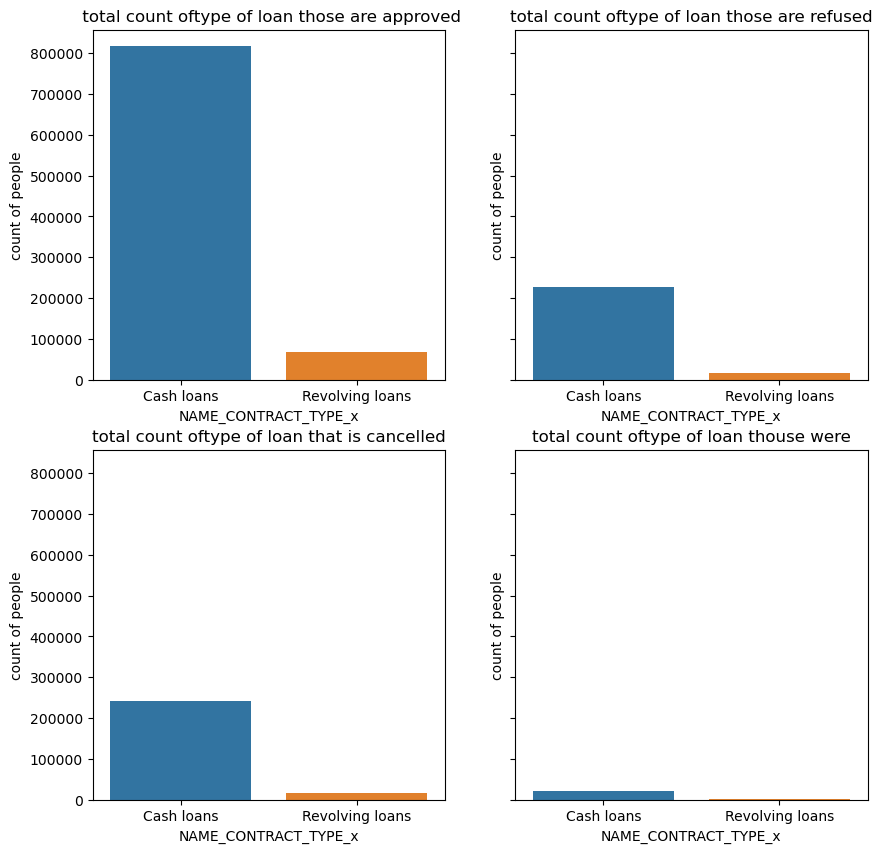

In [154]:
# Four Countplots showing distribution of cash loans and revolving loans across the four dataframes:Approved,Refused,Canceled ,Unused_offer

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2, figsize=(10,10),sharey=True)
Ax1=sns.countplot(ax=ax1,x=Approved['NAME_CONTRACT_TYPE_x'])
ax1.set_title(' total count oftype of loan those are approved')
ax1.set_ylabel('count of people')

Ax2=sns.countplot(ax=ax2,x=Refused['NAME_CONTRACT_TYPE_x'])
ax2.set_title('total count oftype of loan those are refused')
ax2.set_ylabel('count of people')

Ax3=sns.countplot(ax=ax3,x=Canceled['NAME_CONTRACT_TYPE_x'])
ax3.set_title('total count oftype of loan that is cancelled')
ax3.set_ylabel('count of people')

Ax4=sns.countplot(ax=ax4,x=Unused_offer['NAME_CONTRACT_TYPE_x'])
ax4.set_title('total count oftype of loan thouse were')
ax4.set_ylabel('count of people')

**OBSERVATIONS**
* we see there are more cash loan than revolving loan in all the contract status of the loan.

[Text(0, 0, 'Higher education'),
 Text(1, 0, 'Secondary / secondary special'),
 Text(2, 0, 'Incomplete higher'),
 Text(3, 0, 'Lower secondary'),
 Text(4, 0, 'Academic degree')]

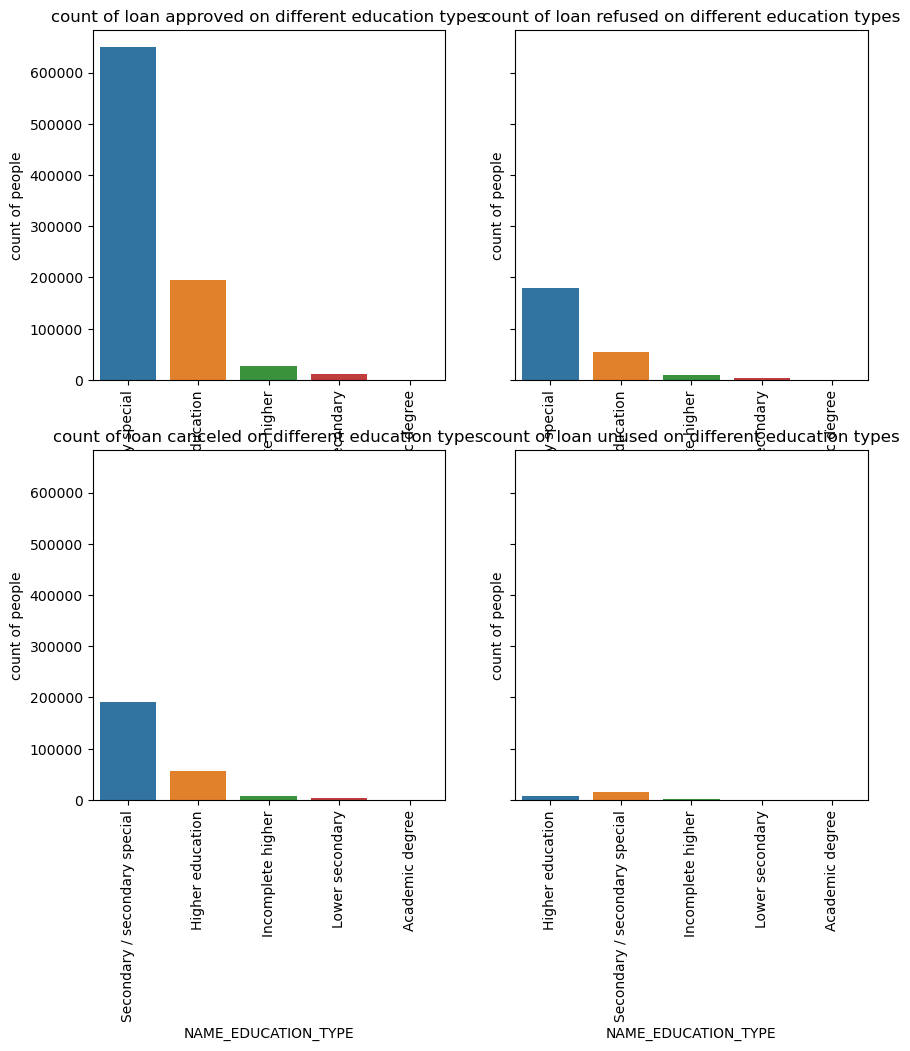

In [155]:
# Four Countplots showing distribution of education_type across the four dataframes:Approved,Refused,Canceled ,Unused_offer

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2, figsize=(10,10),sharey=True)
Ax1=sns.countplot(ax=ax1,x=Approved['NAME_EDUCATION_TYPE'])
ax1.set_title('count of loan approved on different education types')
ax1.set_ylabel('count of people')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

Ax2=sns.countplot(ax=ax2,x=Refused['NAME_EDUCATION_TYPE'])
ax2.set_title('count of loan refused on different education types')
ax2.set_ylabel('count of people')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

Ax3=sns.countplot(ax=ax3,x=Canceled['NAME_EDUCATION_TYPE'])
ax3.set_title('count of loan canceled on different education types')
ax3.set_ylabel('count of people')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

Ax4=sns.countplot(ax=ax4,x=Unused_offer['NAME_EDUCATION_TYPE'])
ax4.set_title('count of loan unused on different education types')
ax4.set_ylabel('count of people')
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)


**OBSERVATIONS**
* For Approved,Refused,Canceled contract status of loan, applicants with Secondary/Secondary sprecial is greater than those of the other education type.
* For Unused_offer applicants with higher education is  greater than Secondary/Secondary sprecial education

[Text(0, 0, 'Commercial associate'),
 Text(1, 0, 'Working'),
 Text(2, 0, 'Pensioner'),
 Text(3, 0, 'State servant'),
 Text(4, 0, 'Unemployed'),
 Text(5, 0, 'Maternity leave')]

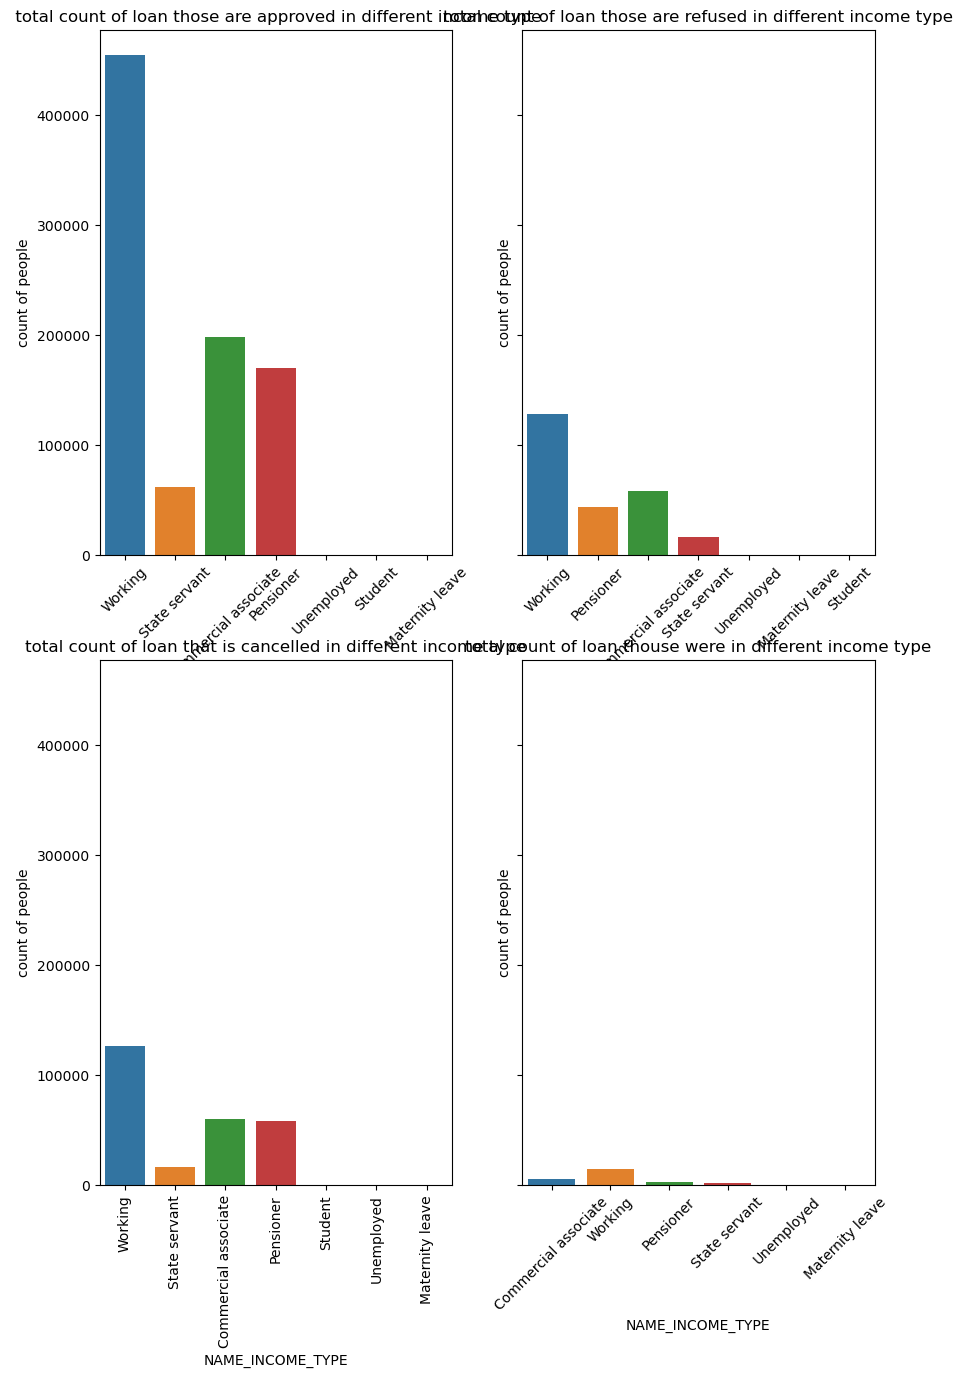

In [156]:
# Four Countplots showing distribution of different income types across the four dataframes:Approved,Refused,Canceled ,Unused_offer

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2, figsize=(10,15),sharey=True)
Ax1=sns.countplot(ax=ax1,x=Approved['NAME_INCOME_TYPE'])
ax1.set_title(' total count of loan those are approved in different income type')
ax1.set_ylabel('count of people')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)


Ax2=sns.countplot(ax=ax2,x=Refused['NAME_INCOME_TYPE'])
ax2.set_title('total count of loan those are refused in different income type')
ax2.set_ylabel('count of people')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)


Ax3=sns.countplot(ax=ax3,x=Canceled['NAME_INCOME_TYPE'])
ax3.set_title('total count of loan that is cancelled in different income type')
ax3.set_ylabel('count of people')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)


Ax4=sns.countplot(ax=ax4,x=Unused_offer['NAME_INCOME_TYPE'])
ax4.set_title('total count of loan thouse were in different income type')
ax4.set_ylabel('count of people')
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=45)


**OBSERVATIONS**
* The loans with approved contract status,have majority of working people.
* The loans with refused contract status,have majority of working people.
* The loans with canceled contract status,have majority of working people.


In [157]:
Approved.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PU

[Text(0, 0, 'Married'),
 Text(1, 0, 'Widow'),
 Text(2, 0, 'Single / not married'),
 Text(3, 0, 'Separated'),
 Text(4, 0, 'Civil marriage')]

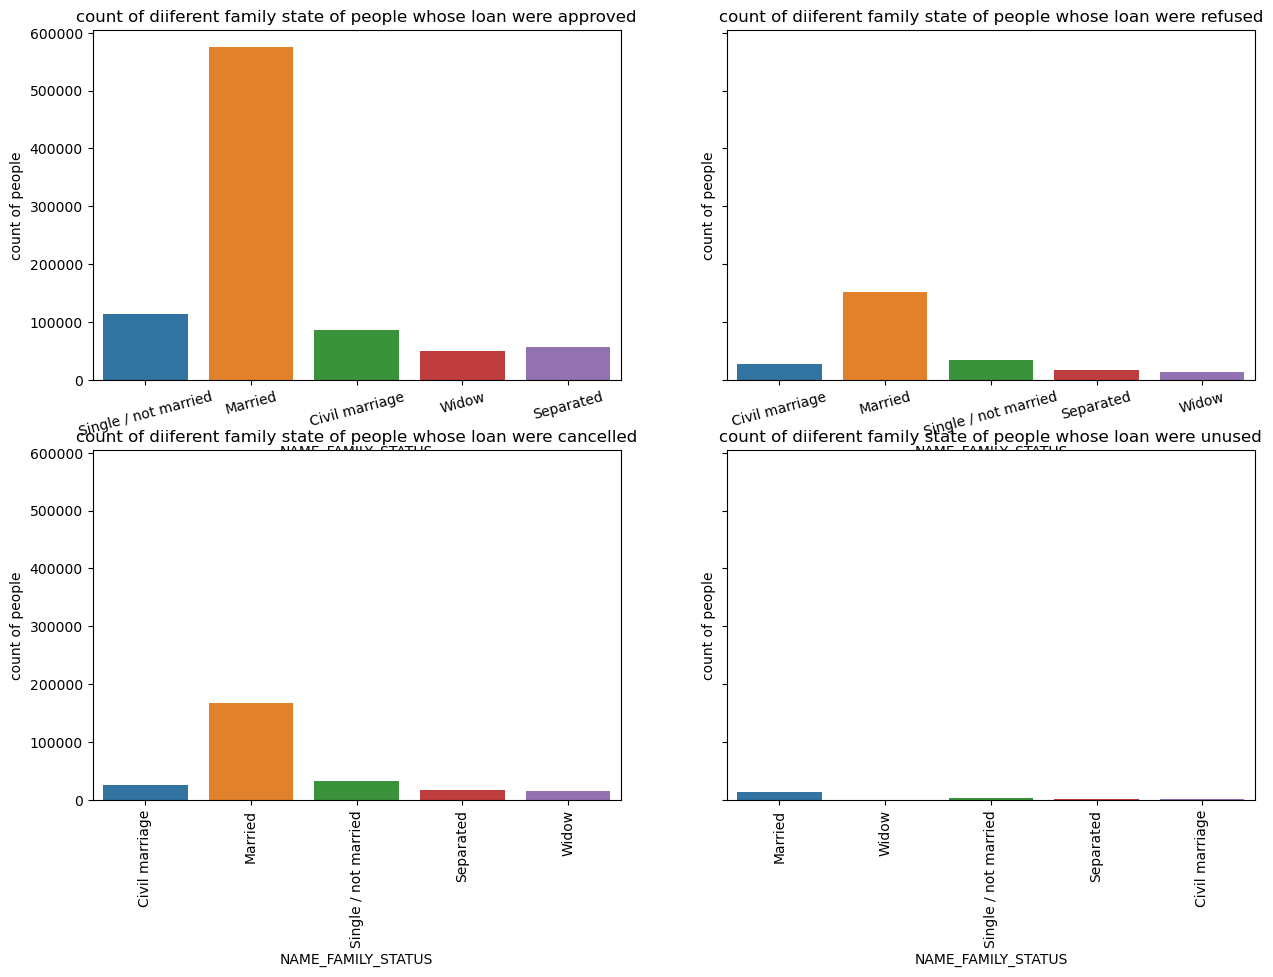

In [158]:
# Four Countplots showing distribution of different family state across the four dataframes:Approved,Refused,Canceled ,Unused_offer

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2, figsize=(15,10),sharey=True)
Ax1=sns.countplot(ax=ax1,x=Approved['NAME_FAMILY_STATUS'])
ax1.set_title('count of diiferent family state of people whose loan were approved')
ax1.set_ylabel('count of people')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=15)


Ax2=sns.countplot(ax=ax2,x=Refused['NAME_FAMILY_STATUS'])
ax2.set_title('count of diiferent family state of people whose loan were refused')
ax2.set_ylabel('count of people')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=15)


Ax3=sns.countplot(ax=ax3,x=Canceled['NAME_FAMILY_STATUS'])
ax3.set_title('count of diiferent family state of people whose loan were cancelled')
ax3.set_ylabel('count of people')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

Ax4=sns.countplot(ax=ax4,x=Unused_offer['NAME_FAMILY_STATUS'])
ax4.set_title('count of diiferent family state of people whose loan were unused')
ax4.set_ylabel('count of people')
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)


[Text(0, 0, 'House / apartment'),
 Text(1, 0, 'With parents'),
 Text(2, 0, 'Co-op apartment'),
 Text(3, 0, 'Municipal apartment'),
 Text(4, 0, 'Office apartment'),
 Text(5, 0, 'Rented apartment')]

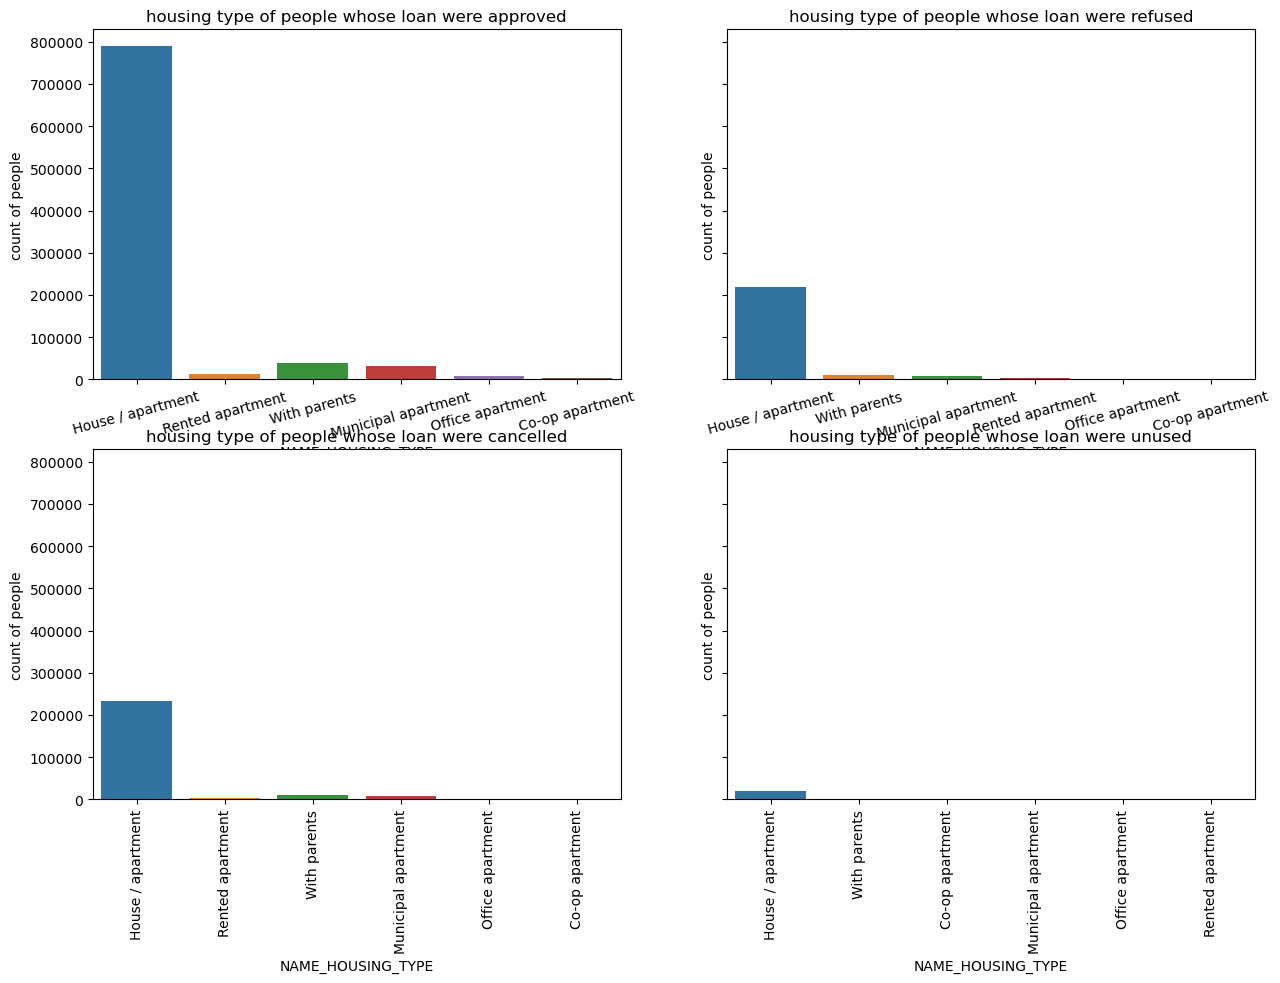

In [159]:
# Four Countplots showing distribution of different housing types across the four dataframes:Approved,Refused,Canceled ,Unused_offer

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2, figsize=(15,10),sharey=True)
Ax1=sns.countplot(ax=ax1,x=Approved['NAME_HOUSING_TYPE'])
ax1.set_title('housing type of people whose loan were approved')
ax1.set_ylabel('count of people')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=15)


Ax2=sns.countplot(ax=ax2,x=Refused['NAME_HOUSING_TYPE'])
ax2.set_title('housing type of people whose loan were refused')
ax2.set_ylabel('count of people')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=15)


Ax3=sns.countplot(ax=ax3,x=Canceled['NAME_HOUSING_TYPE'])
ax3.set_title('housing type of people whose loan were cancelled')
ax3.set_ylabel('count of people')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

Ax4=sns.countplot(ax=ax4,x=Unused_offer['NAME_HOUSING_TYPE'])
ax4.set_title('housing type of people whose loan were unused')
ax4.set_ylabel('count of people')
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)

**OBSERVATIONS**
* in all contract status, the majority ofapplicants have House/appartments.

Text(0, 0.5, 'count of people')

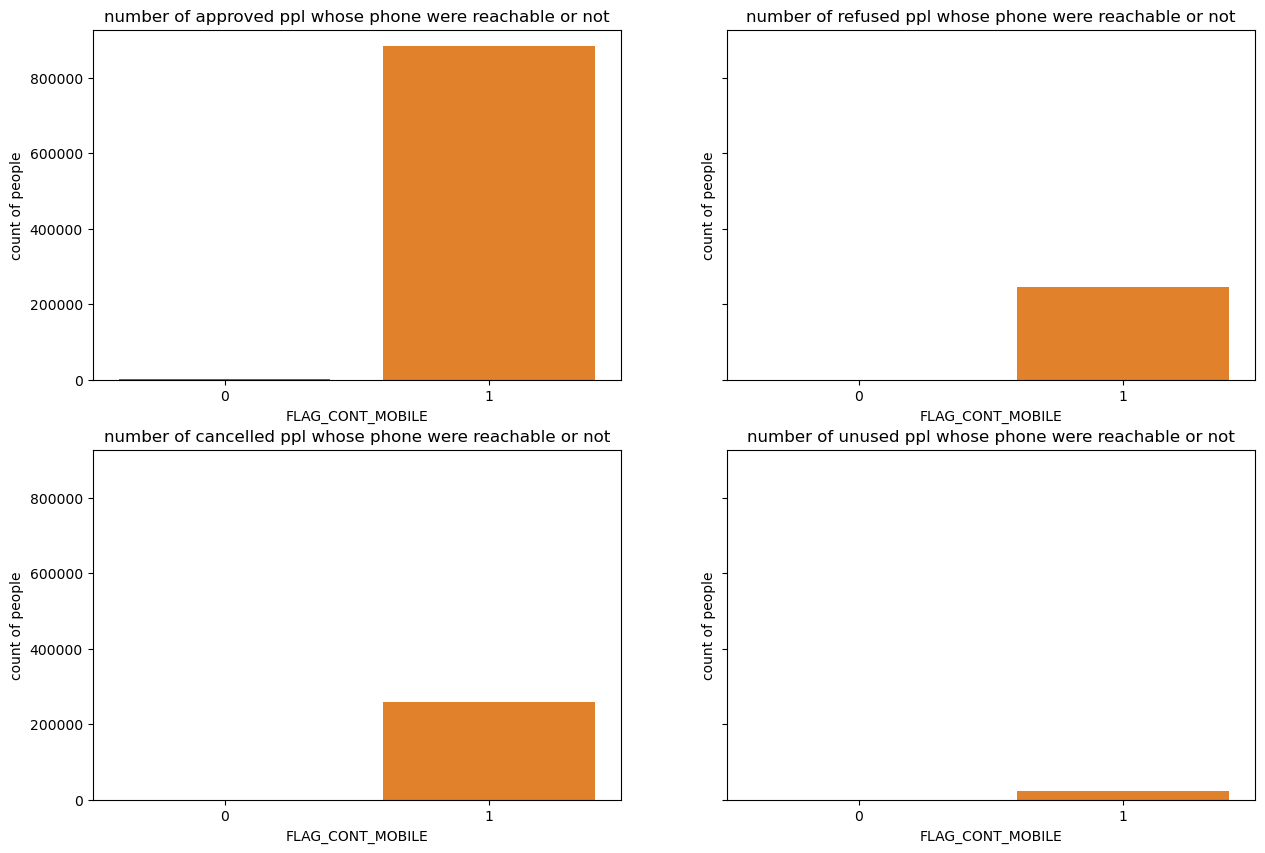

In [160]:
# Four Countplots showing distribution of wheter the appricants phone was reachable or not across the four dataframes:Approved,Refused,Canceled ,Unused_offer

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2, figsize=(15,10),sharey=True)
Ax1=sns.countplot(ax=ax1,x=Approved['FLAG_CONT_MOBILE'])
ax1.set_title('number of approved ppl whose phone were reachable or not')
ax1.set_ylabel('count of people')


Ax2=sns.countplot(ax=ax2,x=Refused['FLAG_CONT_MOBILE'])
ax2.set_title('number of refused ppl whose phone were reachable or not')
ax2.set_ylabel('count of people')


Ax3=sns.countplot(ax=ax3,x=Canceled['FLAG_CONT_MOBILE'])
ax3.set_title('number of cancelled ppl whose phone were reachable or not')
ax3.set_ylabel('count of people')

Ax4=sns.countplot(ax=ax4,x=Unused_offer['FLAG_CONT_MOBILE'])
ax4.set_title('number of unused ppl whose phone were reachable or not')
ax4.set_ylabel('count of people')


*****************************************************************